# Imports

In [20]:
# ---------------------------------------------
# Import Libraries for Plotting
# ---------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------
# Import Libraries for Statistical Analysis
# ---------------------------------------------
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import zscore
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# ---------------------------------------------
# Import Libraries for Machine Learning
# ---------------------------------------------
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# ---------------------------------------------
# Import Libraries for Deep Learning (LSTM)
# ---------------------------------------------
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# ---------------------------------------------
# General Utility Libraries
# ---------------------------------------------
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv(r"C:\Users\Akash\Documents\Jupyter\IDSE\Project\Data set\Updated\Updated\Nifty_50_data.csv")
#print(df['Date'])
df['Date'] = pd.to_datetime(df['Date'])
#print(df['Date'])
df.set_index('Date', inplace=True)


In [4]:
print(df.info())
print("Na Values:")
print(df.isna().sum())
print("Null Values")
print(df.isnull().sum())
df


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3878 entries, 2008-01-01 00:00:00+00:00 to 2023-10-27 00:00:00+00:00
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  3878 non-null   float64
 1   Close      3878 non-null   float64
 2   High       3878 non-null   float64
 3   Low        3878 non-null   float64
 4   Open       3878 non-null   float64
 5   Volume     3878 non-null   int64  
 6   Symbol     3878 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 242.4+ KB
None
Na Values:
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
Symbol       0
dtype: int64
Null Values
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
Symbol       0
dtype: int64


,Adj Close,Close,High,Low,Open,Volume,Symbol
Date,,,,,,,
2008-01-01 00:00:00+00:00,6144.350098,6144.350098,6165.350098,6109.850098,6136.750000,0,NIFTY
2008-01-02 00:00:00+00:00,6179.399902,6179.399902,6197.000000,6060.850098,6144.700195,0,NIFTY
2008-01-03 00:00:00+00:00,6178.549805,6178.549805,6230.149902,6126.399902,6184.250000,0,NIFTY
2008-01-04 00:00:00+00:00,6274.299805,6274.299805,6300.049805,6179.100098,6179.100098,0,NIFTY
2008-01-07 00:00:00+00:00,6279.100098,6279.100098,6289.799805,6193.350098,6271.000000,0,NIFTY
...,...,...,...,...,...,...,...
2023-10-20 00:00:00+00:00,19542.650390,19542.650390,19593.800780,19518.699220,19542.150390,198300,NIFTY
2023-10-23 00:00:00+00:00,19281.750000,19281.750000,19556.849610,19257.849610,19521.599610,176000,NIFTY
2023-10-25 00:00:00+00:00,19122.150390,19122.150390,19347.300780,19074.150390,19286.449220,225300,NIFTY


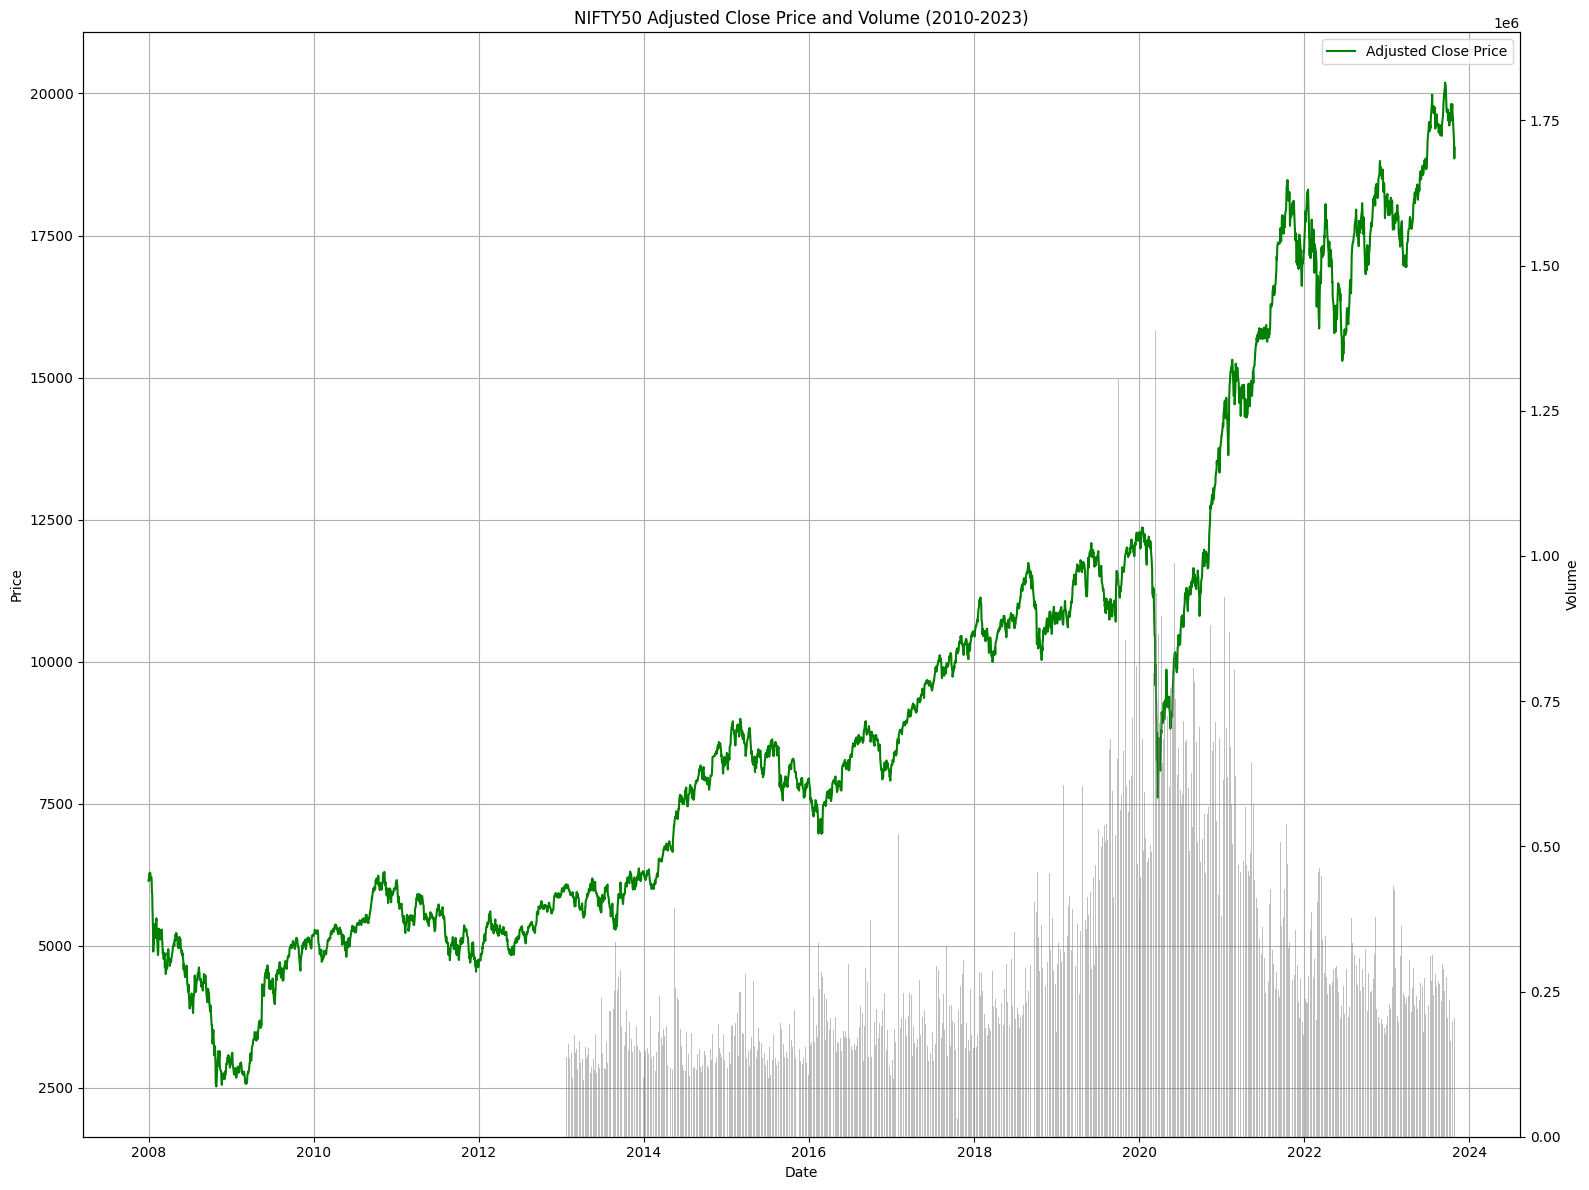

In [5]:
fig, axs = plt.subplots(1, 1, figsize=(16, 12), sharex=False)

axs.plot(df['Adj Close'], label='Adjusted Close Price', color='green')
axs.set_title('NIFTY50 Adjusted Close Price and Volume (2010-2023)')
axs.set_ylabel('Price')
axs.legend()
axs.grid()
ax2 = axs.twinx()
ax2.bar(df.index, df['Volume'], color='gray', alpha=0.5, width=1)
ax2.set_ylabel('Volume')

axs.set_xlabel('Date')

plt.tight_layout()
plt.show()

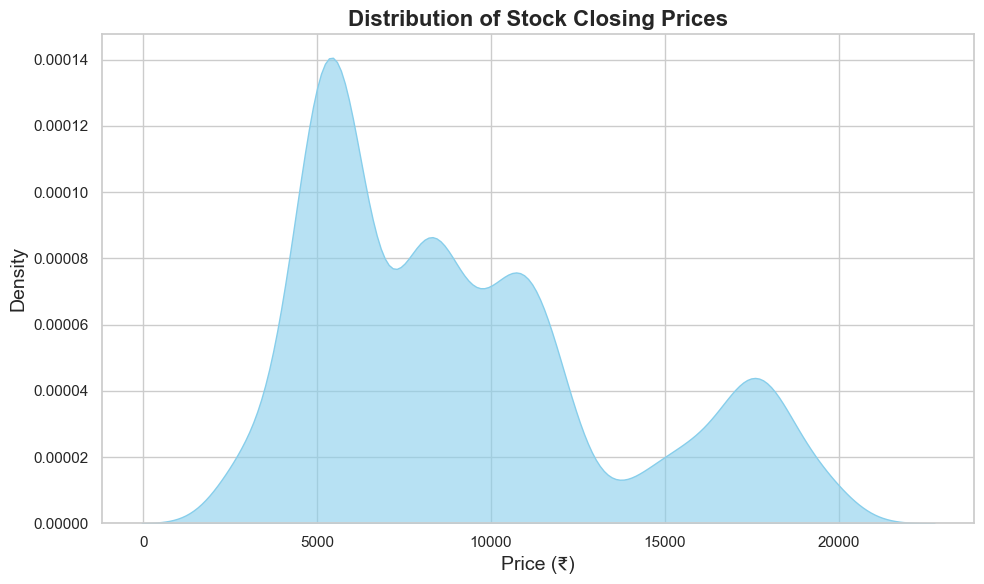

In [6]:
# Use Seaborn style
sns.set(style="whitegrid")

# Create the KDE plot with Seaborn
plt.figure(figsize=(10, 6))

# Plot KDE with Seaborn (better styling and aesthetics)
sns.kdeplot(df['Close'], shade=True, color='skyblue', lw=1, alpha=0.6)

# Add title and labels with improved formatting
plt.title('Distribution of Stock Closing Prices', fontsize=16, fontweight='bold')
plt.xlabel('Price (₹)', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

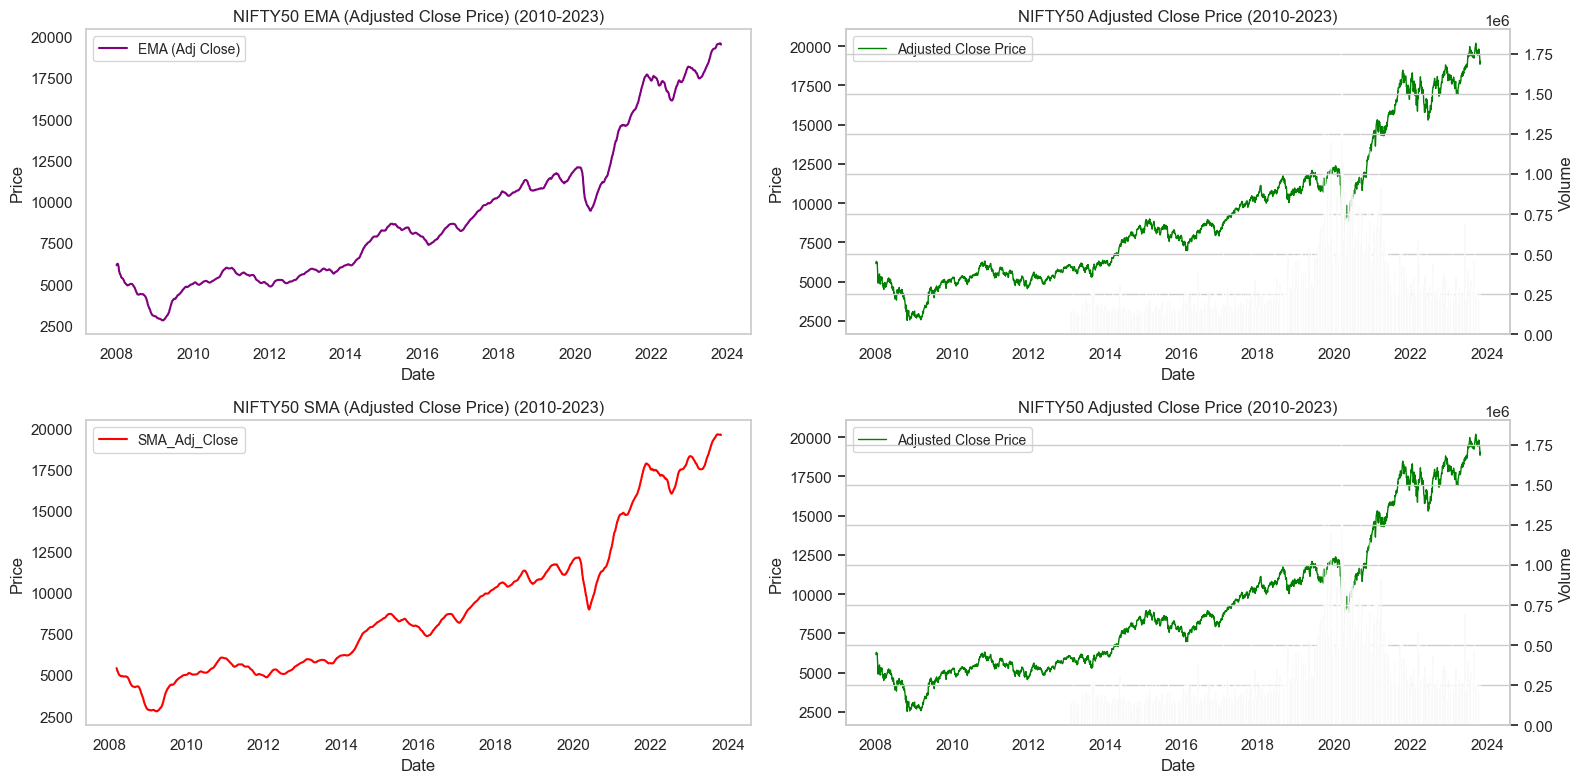

In [7]:
# Calculate moving averages
sma_window = 50

df['SMA_Adj_Close'] = df['Adj Close'].rolling(window=sma_window).mean()
df['EMA_Adj_Close'] = df['Adj Close'].ewm(span=sma_window, adjust=True).mean()

fig, axs = plt.subplots(2, 2, figsize=(16, 8), sharex=False)

# Colors for better distinction
open_color = 'orange'
close_color = 'blue'
adj_close_color = 'green'
sma_color = 'red'
ema_color = 'purple'



# Plot for Adjusted Close Price
axs[0][0].plot(df['EMA_Adj_Close'], label='EMA (Adj Close)', color=ema_color, linestyle='-', linewidth=1.5)
axs[0][0].set_title('NIFTY50 EMA (Adjusted Close Price) (2010-2023)')
axs[0][0].set_ylabel('Price')
axs[0][0].legend(fontsize=10)
axs[0][0].grid()

axs[0][1].plot(df['Adj Close'], label='Adjusted Close Price', color=adj_close_color, linewidth=1)
axs[0][1].set_title('NIFTY50 Adjusted Close Price (2010-2023)')
axs[0][1].set_ylabel('Price')
axs[0][1].legend(fontsize=10)
axs[0][1].grid()

# Adding Volume to Adjusted Close Price Plot
ax2 = axs[0][1].twinx()
ax2.bar(df.index, df['Volume'], color='lightgray', alpha=0.5, width=1)
ax2.set_ylabel('Volume')

# Set the x-axis label for the bottom row
axs[0][0].set_xlabel('Date')
axs[0][1].set_xlabel('Date')


axs[1][0].plot(df['SMA_Adj_Close'], label='SMA_Adj_Close', color=sma_color, linestyle='-', linewidth=1.5)
axs[1][0].set_title('NIFTY50 SMA (Adjusted Close Price) (2010-2023)')
axs[1][0].set_ylabel('Price')
axs[1][0].legend(fontsize=10)
axs[1][0].grid()

axs[1][1].plot(df['Adj Close'], label='Adjusted Close Price', color=adj_close_color, linewidth=1)
axs[1][1].set_title('NIFTY50 Adjusted Close Price (2010-2023)')
axs[1][1].set_ylabel('Price')
axs[1][1].legend(fontsize=10)
axs[1][1].grid()

# Adding Volume to Adjusted Close Price Plot
ax2 = axs[1][1].twinx()
ax2.bar(df.index, df['Volume'], color='lightgray', alpha=0.5, width=1)
ax2.set_ylabel('Volume')

# Set the x-axis label for the bottom row
axs[1][0].set_xlabel('Date')
axs[1][1].set_xlabel('Date')

plt.tight_layout()
plt.show()

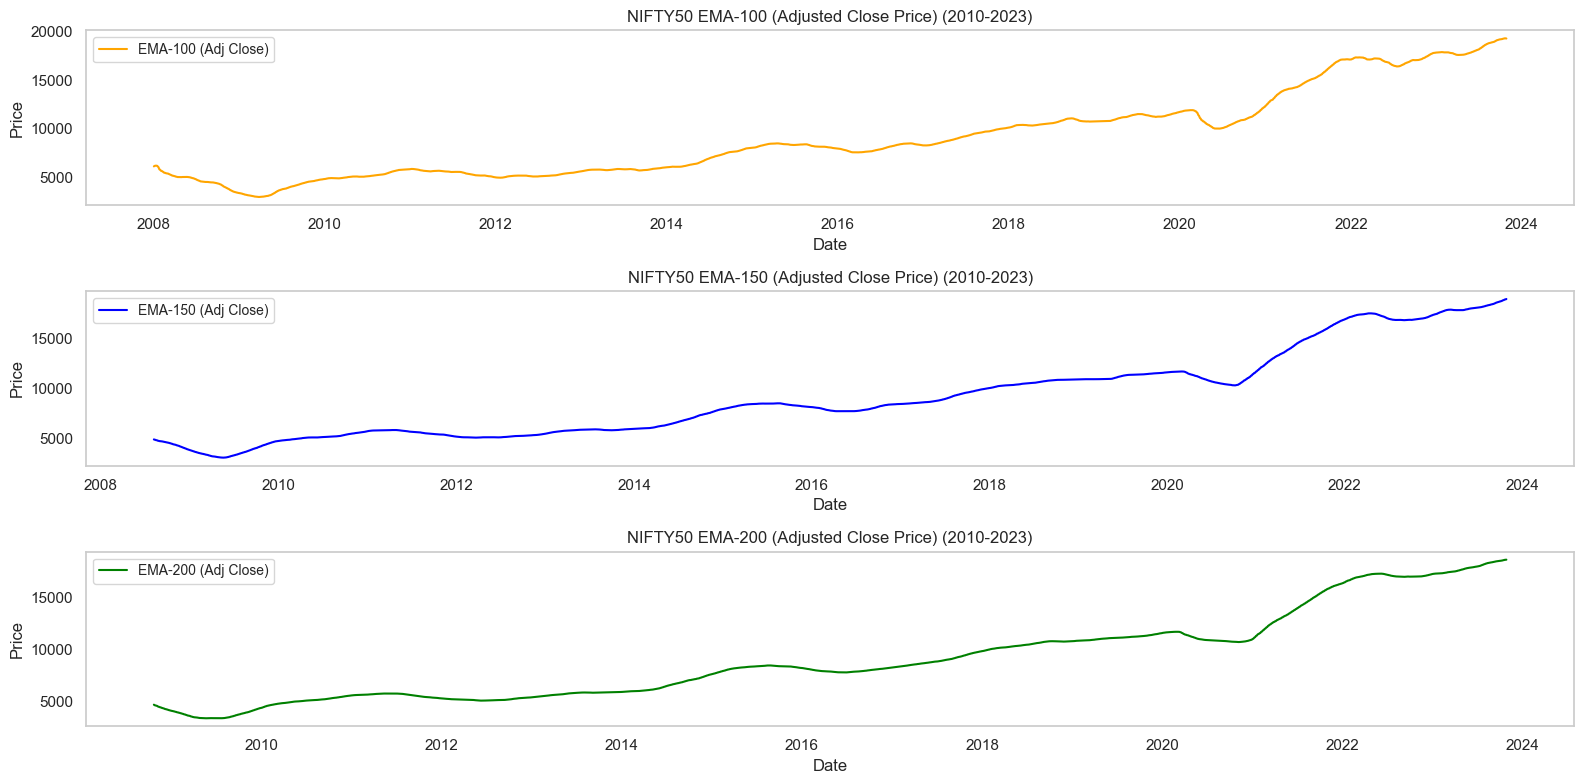

In [8]:
# Calculate moving averages
sma_window100 = 100
sma150 = 150
sma200 = 200

df['SMA_Adj_Close_100'] = df['Adj Close'].rolling(window=sma_window100).mean()
df['EMA_Adj_Close_100'] = df['Adj Close'].ewm(span=sma_window100, adjust=True).mean()

df['SMA_Adj_Close_150'] = df['Adj Close'].rolling(window=sma150).mean()
df['EMA_Adj_Close_150'] = df['Adj Close'].ewm(span=sma150, adjust=True).mean()

df['SMA_Adj_Close_200'] = df['Adj Close'].rolling(window=sma200).mean()
df['EMA_Adj_Close_200'] = df['Adj Close'].ewm(span=sma200, adjust=True).mean()

fig, axs = plt.subplots(3, 1, figsize=(16, 8), sharex=False)

# Colors for better distinction
open_color = 'orange'
close_color = 'blue'
adj_close_color = 'green'
sma_color = 'red'
ema_color = 'purple'



# Plot for Adjusted Close Price
axs[0].plot(df['EMA_Adj_Close_100'], label='EMA-100 (Adj Close)', color=open_color, linestyle='-', linewidth=1.5)
axs[0].set_title('NIFTY50 EMA-100 (Adjusted Close Price) (2010-2023)')
axs[0].set_ylabel('Price')
axs[0].legend(fontsize=10)
axs[0].grid()

axs[1].plot(df['SMA_Adj_Close_150'], label='EMA-150 (Adj Close)', color=close_color, linewidth=1.5)
axs[1].set_title('NIFTY50 EMA-150 (Adjusted Close Price) (2010-2023)')
axs[1].set_ylabel('Price')
axs[1].legend(fontsize=10)
axs[1].grid()

axs[2].plot(df['SMA_Adj_Close_200'], label='EMA-200 (Adj Close)', color=adj_close_color, linestyle='-', linewidth=1.5)
axs[2].set_title('NIFTY50 EMA-200 (Adjusted Close Price) (2010-2023)')
axs[2].set_ylabel('Price')
axs[2].legend(fontsize=10)
axs[2].grid()

# Set the x-axis label for the bottom row
axs[0].set_xlabel('Date')
axs[1].set_xlabel('Date')
axs[2].set_xlabel('Date')

plt.tight_layout()
plt.show()

In [9]:
# Calculate RSI
def calculate_rsi(data, window=20):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI'] = calculate_rsi(df)


In [10]:
# Calculate MACD
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['EMA_12'] - df['EMA_26']
df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()


In [11]:
# Calculate Bollinger Bands
bb_window = 20
df['BB_Middle'] = df['Close'].rolling(window=bb_window).mean()
df['BB_Upper'] = df['BB_Middle'] + 2 * df['Close'].rolling(window=bb_window).std()
df['BB_Lower'] = df['BB_Middle'] - 2 * df['Close'].rolling(window=bb_window).std()


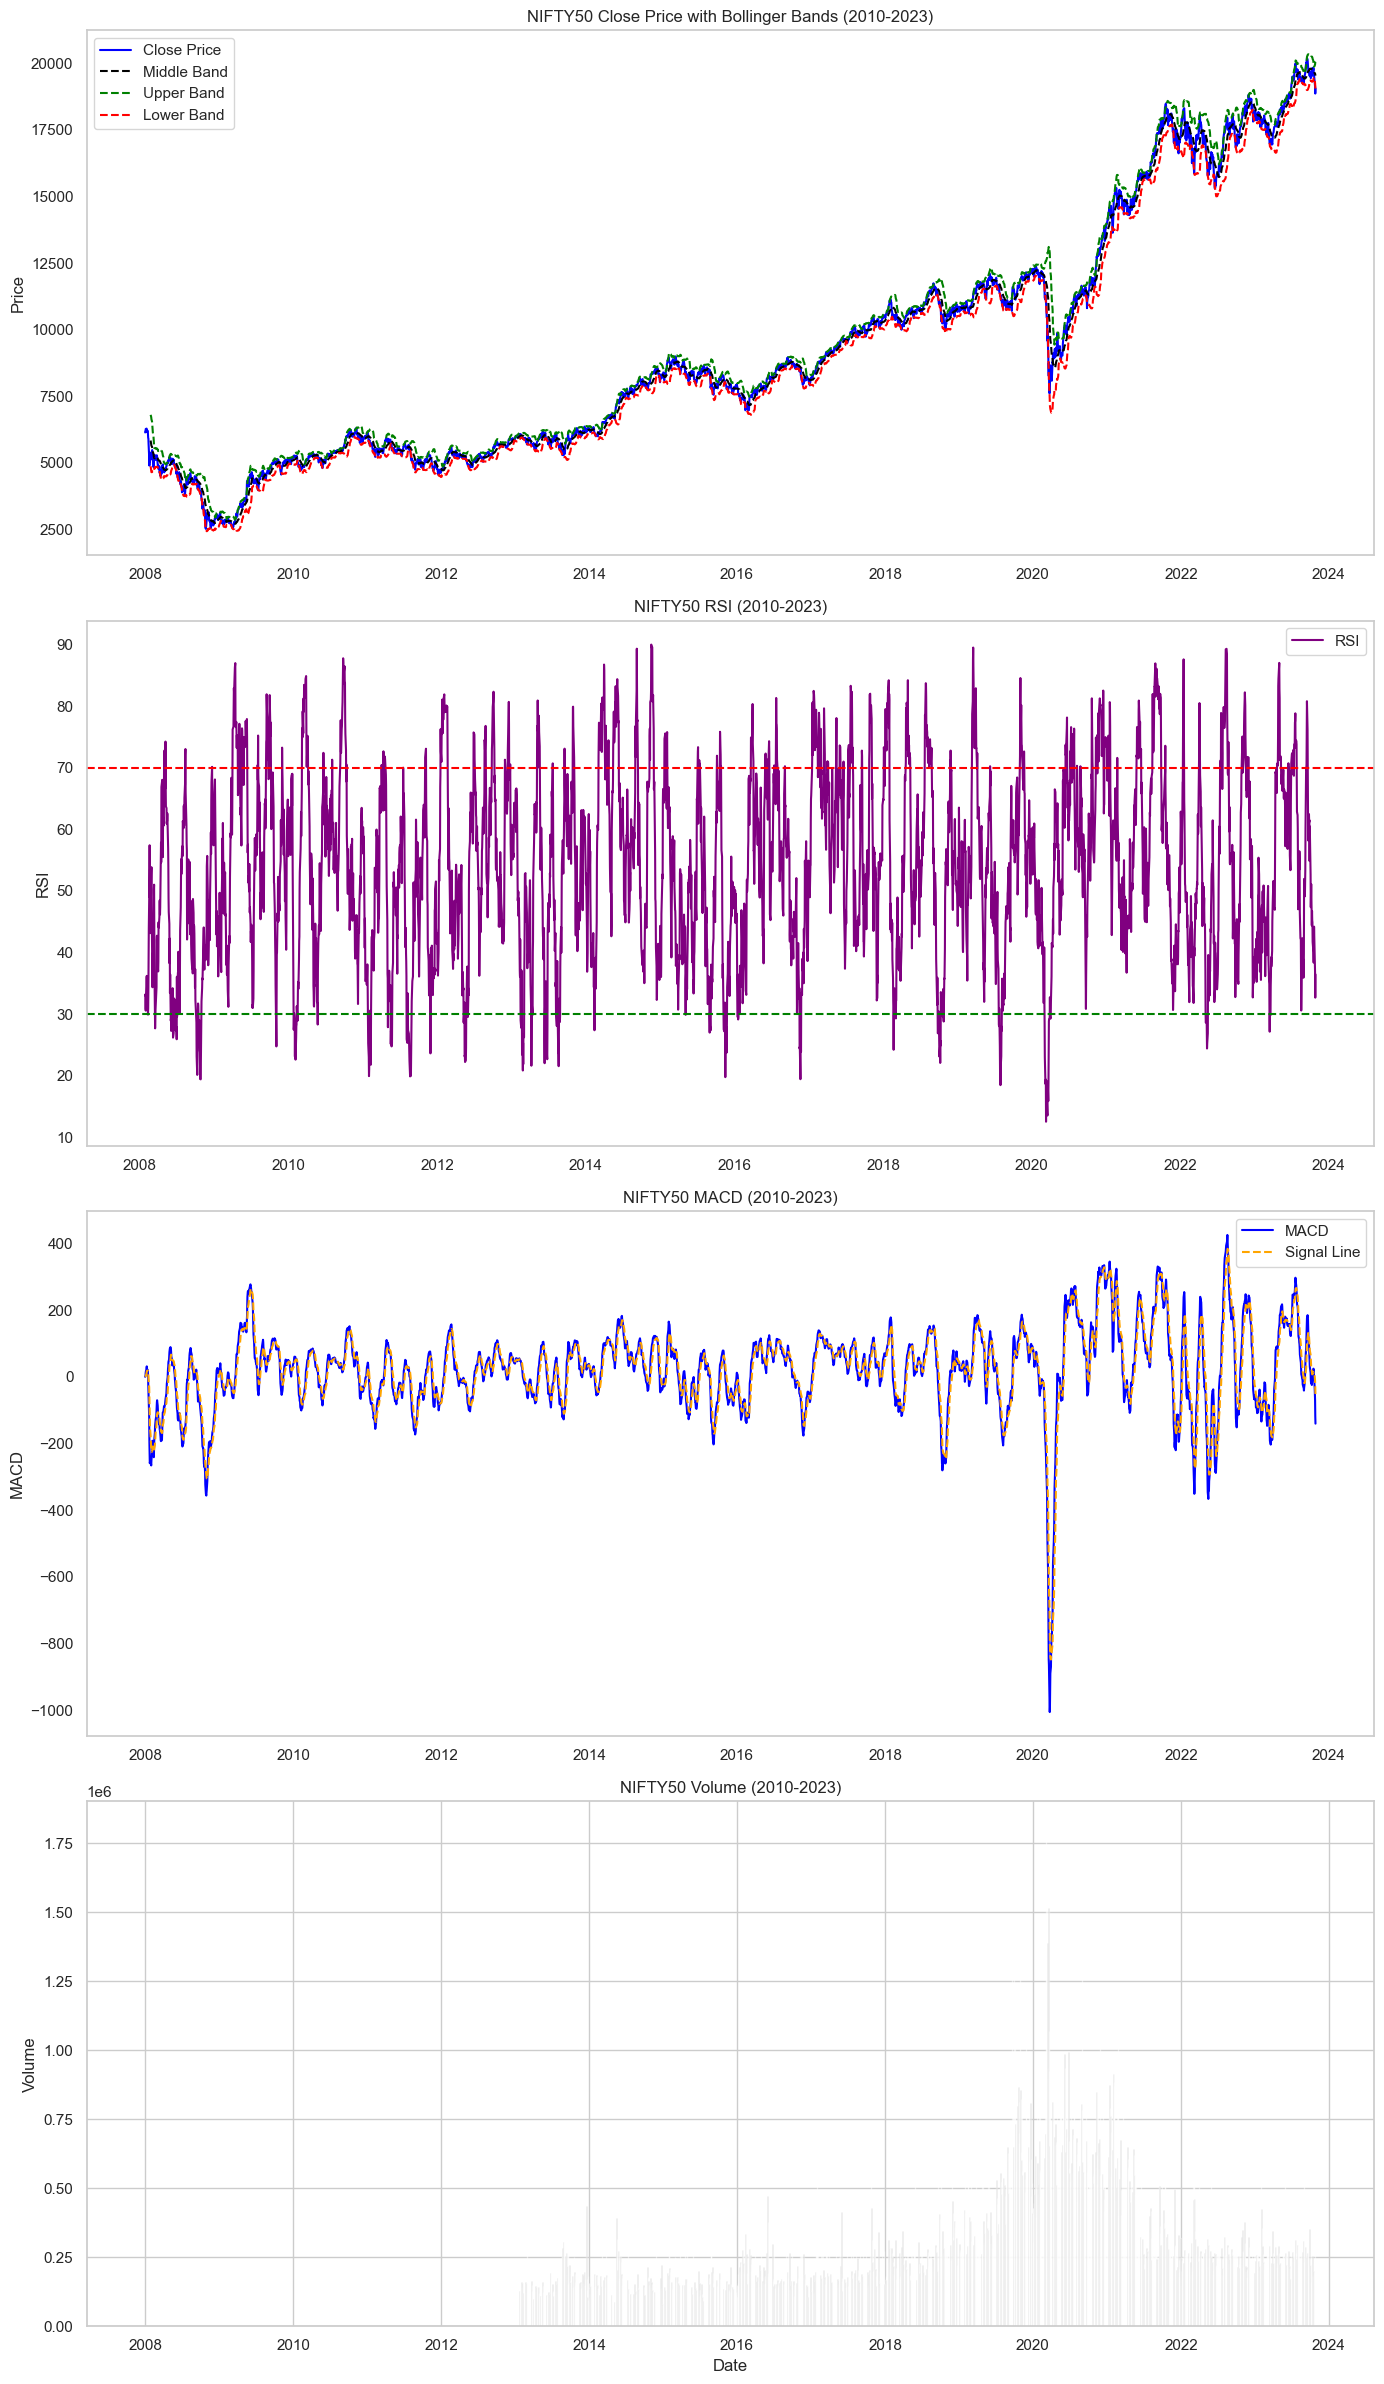

In [12]:
fig, axs = plt.subplots(4, 1, figsize=(14, 24), sharex=False)

# Plot Close Price and Bollinger Bands
axs[0].plot(df.index, df['Close'], label='Close Price', color='blue')
axs[0].plot(df.index, df['BB_Middle'], label='Middle Band', color='black', linestyle='--')
axs[0].plot(df.index, df['BB_Upper'], label='Upper Band', color='green', linestyle='--')
axs[0].plot(df.index, df['BB_Lower'], label='Lower Band', color='red', linestyle='--')
axs[0].set_title('NIFTY50 Close Price with Bollinger Bands (2010-2023)')
axs[0].set_ylabel('Price')
axs[0].legend()
axs[0].grid()

# Plot RSI
axs[1].plot(df.index, df['RSI'], label='RSI', color='purple')
axs[1].axhline(70, color='red', linestyle='--')
axs[1].axhline(30, color='green', linestyle='--')
axs[1].set_title('NIFTY50 RSI (2010-2023)')
axs[1].set_ylabel('RSI')
axs[1].legend()
axs[1].grid()

# Plot MACD and Signal Line
axs[2].plot(df.index, df['MACD'], label='MACD', color='blue')
axs[2].plot(df.index, df['Signal_Line'], label='Signal Line', color='orange', linestyle='--')
axs[2].set_title('NIFTY50 MACD (2010-2023)')
axs[2].set_ylabel('MACD')
axs[2].legend()
axs[2].grid()

# Volume for reference
axs[3].bar(df.index, df['Volume'], color='gray', alpha=0.5)
axs[3].set_title('NIFTY50 Volume (2010-2023)')
axs[3].set_ylabel('Volume')
axs[3].set_xlabel('Date')

plt.tight_layout()
plt.show()

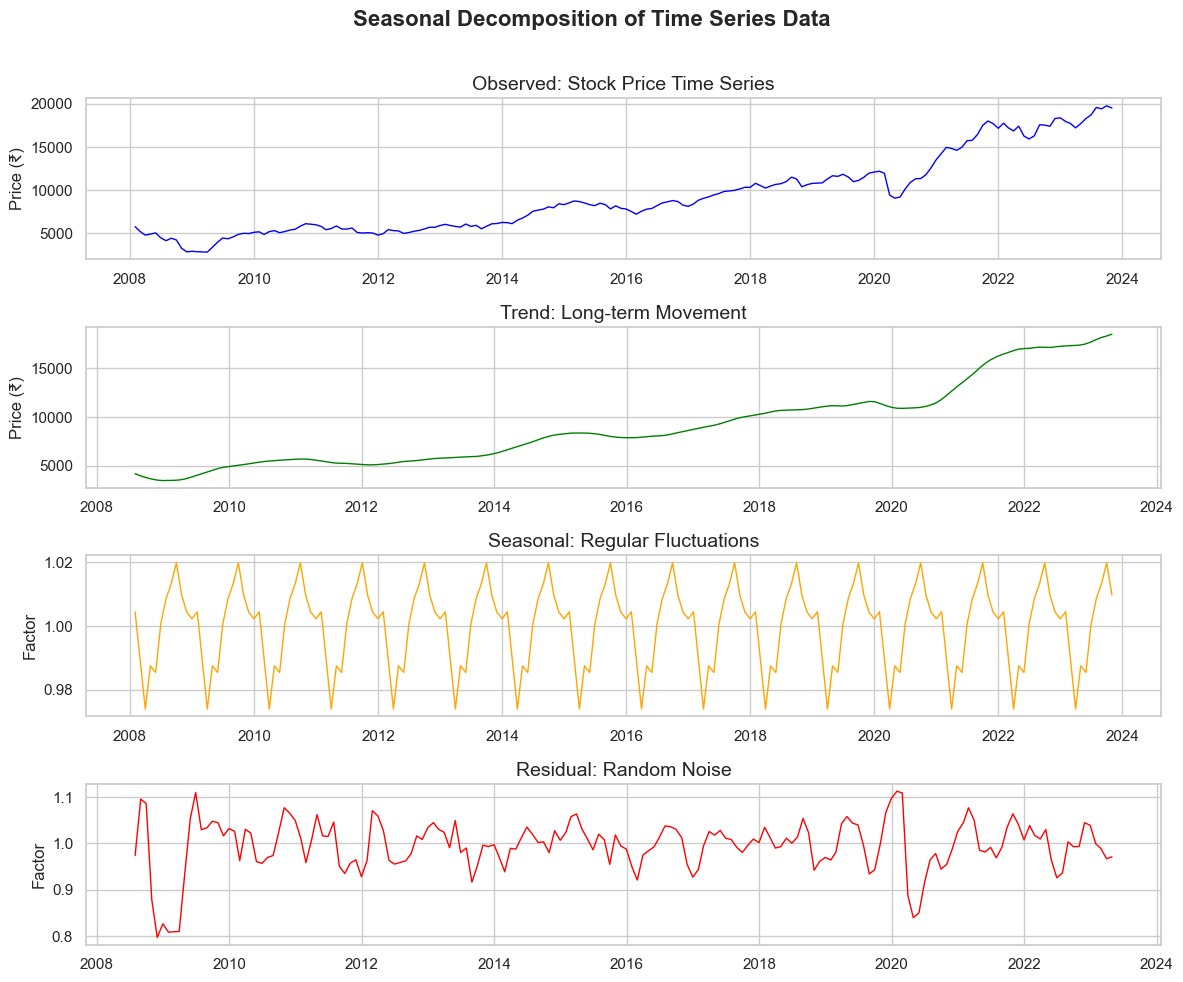

In [13]:
# Ensure you have a Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Resample to monthly data
df_monthly = df['Close'].resample('ME').mean()

# Perform seasonal decomposition
decomposition = seasonal_decompose(df_monthly, model='multiplicative')

# Create a larger figure for better readability
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=False)

# Plotting each component with additional styling
axes[0].plot(decomposition.observed, color='blue', lw=1)
axes[0].set_title('Observed: Stock Price Time Series', fontsize=14)
axes[0].set_ylabel('Price (₹)', fontsize=12)
axes[0].grid(True)

axes[1].plot(decomposition.trend, color='green', lw=1)
axes[1].set_title('Trend: Long-term Movement', fontsize=14)
axes[1].set_ylabel('Price (₹)', fontsize=12)
axes[1].grid(True)

axes[2].plot(decomposition.seasonal, color='orange', lw=1)
axes[2].set_title('Seasonal: Regular Fluctuations', fontsize=14)
axes[2].set_ylabel('Factor', fontsize=12)
axes[2].grid(True)

axes[3].plot(decomposition.resid, color='red', lw=1)
axes[3].set_title('Residual: Random Noise', fontsize=14)
axes[3].set_ylabel('Factor', fontsize=12)
axes[3].grid(True)

# Overall figure title and layout improvements
fig.suptitle('Seasonal Decomposition of Time Series Data', fontsize=16, fontweight='bold')
fig.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust space to make room for title

# Show the plot
plt.show()

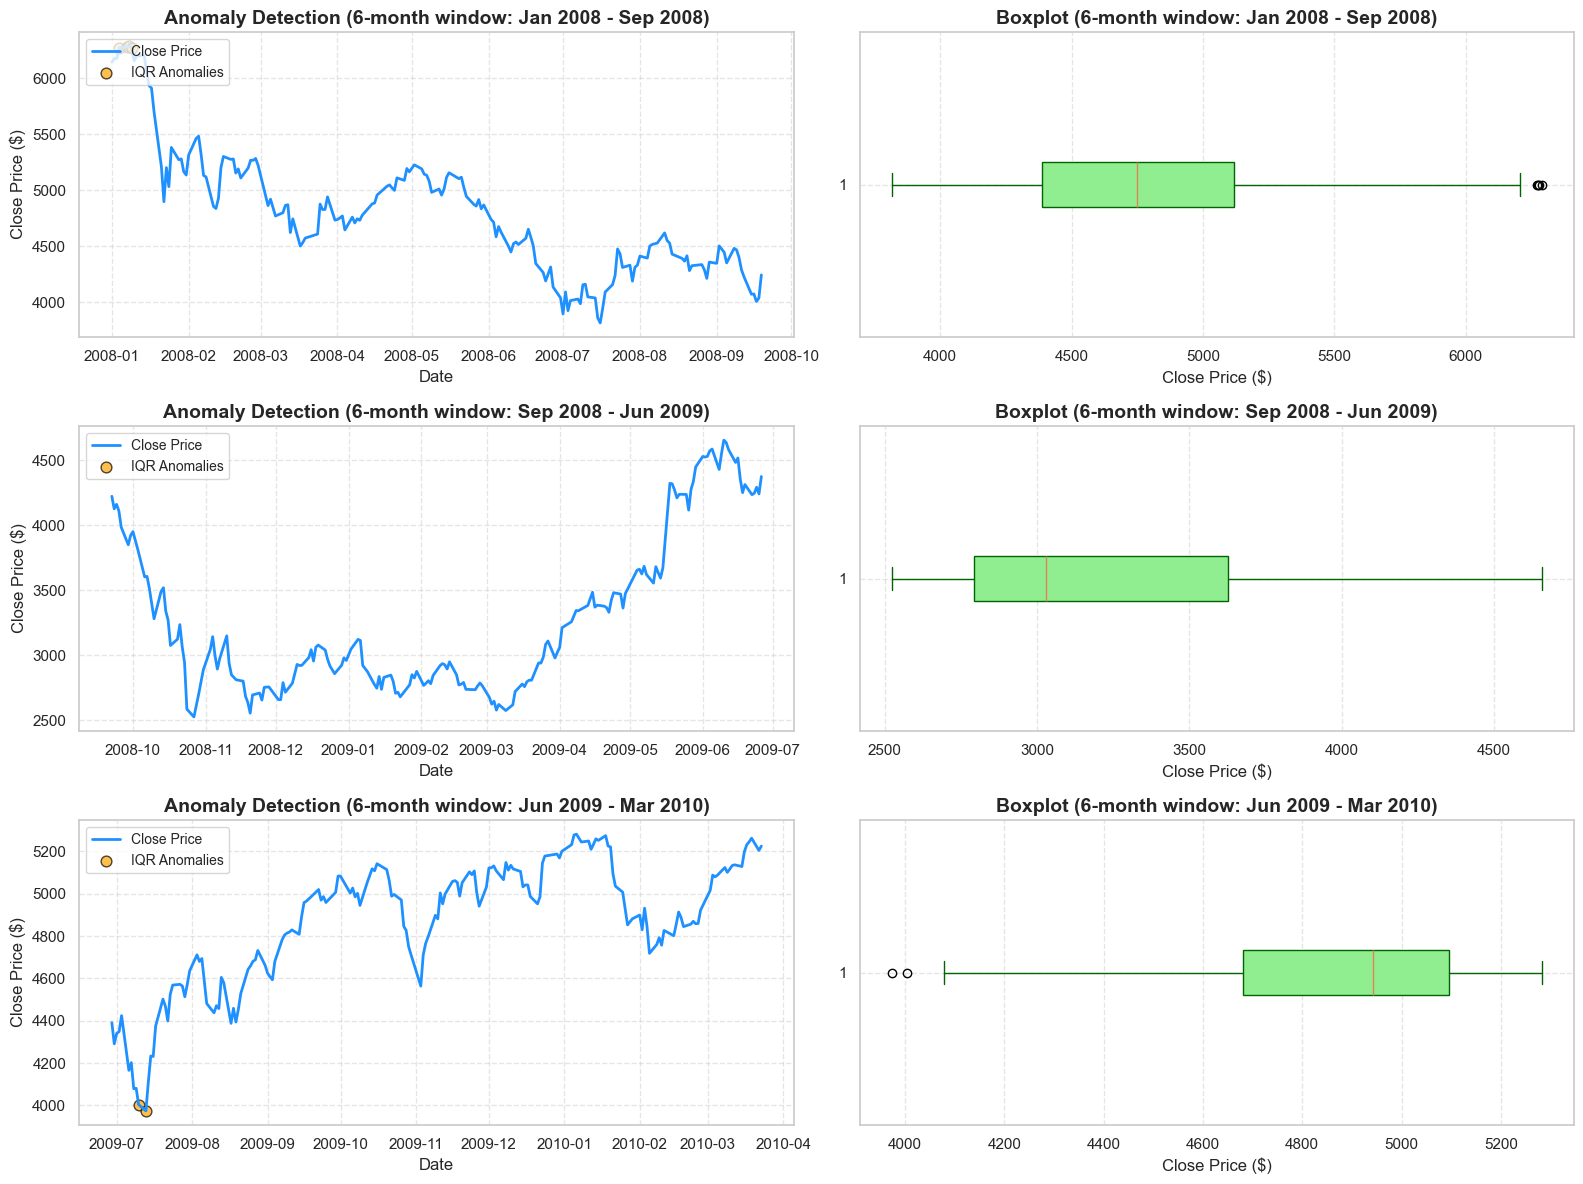

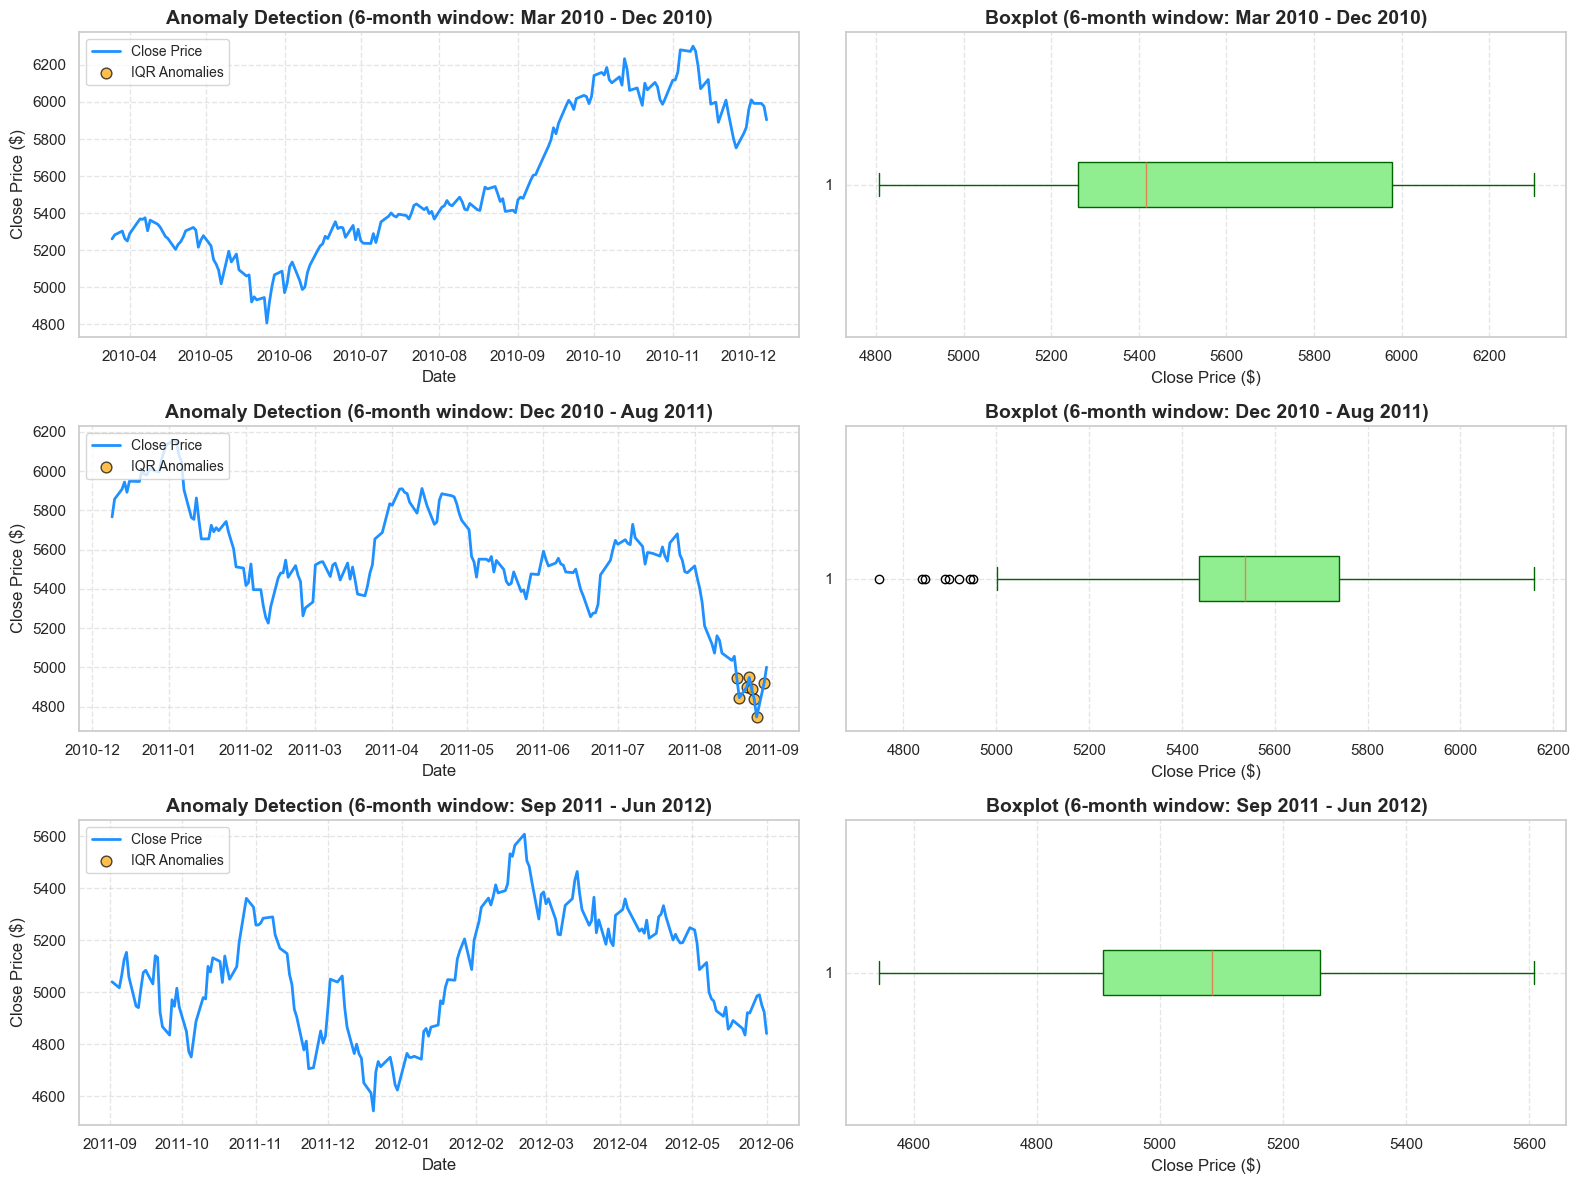

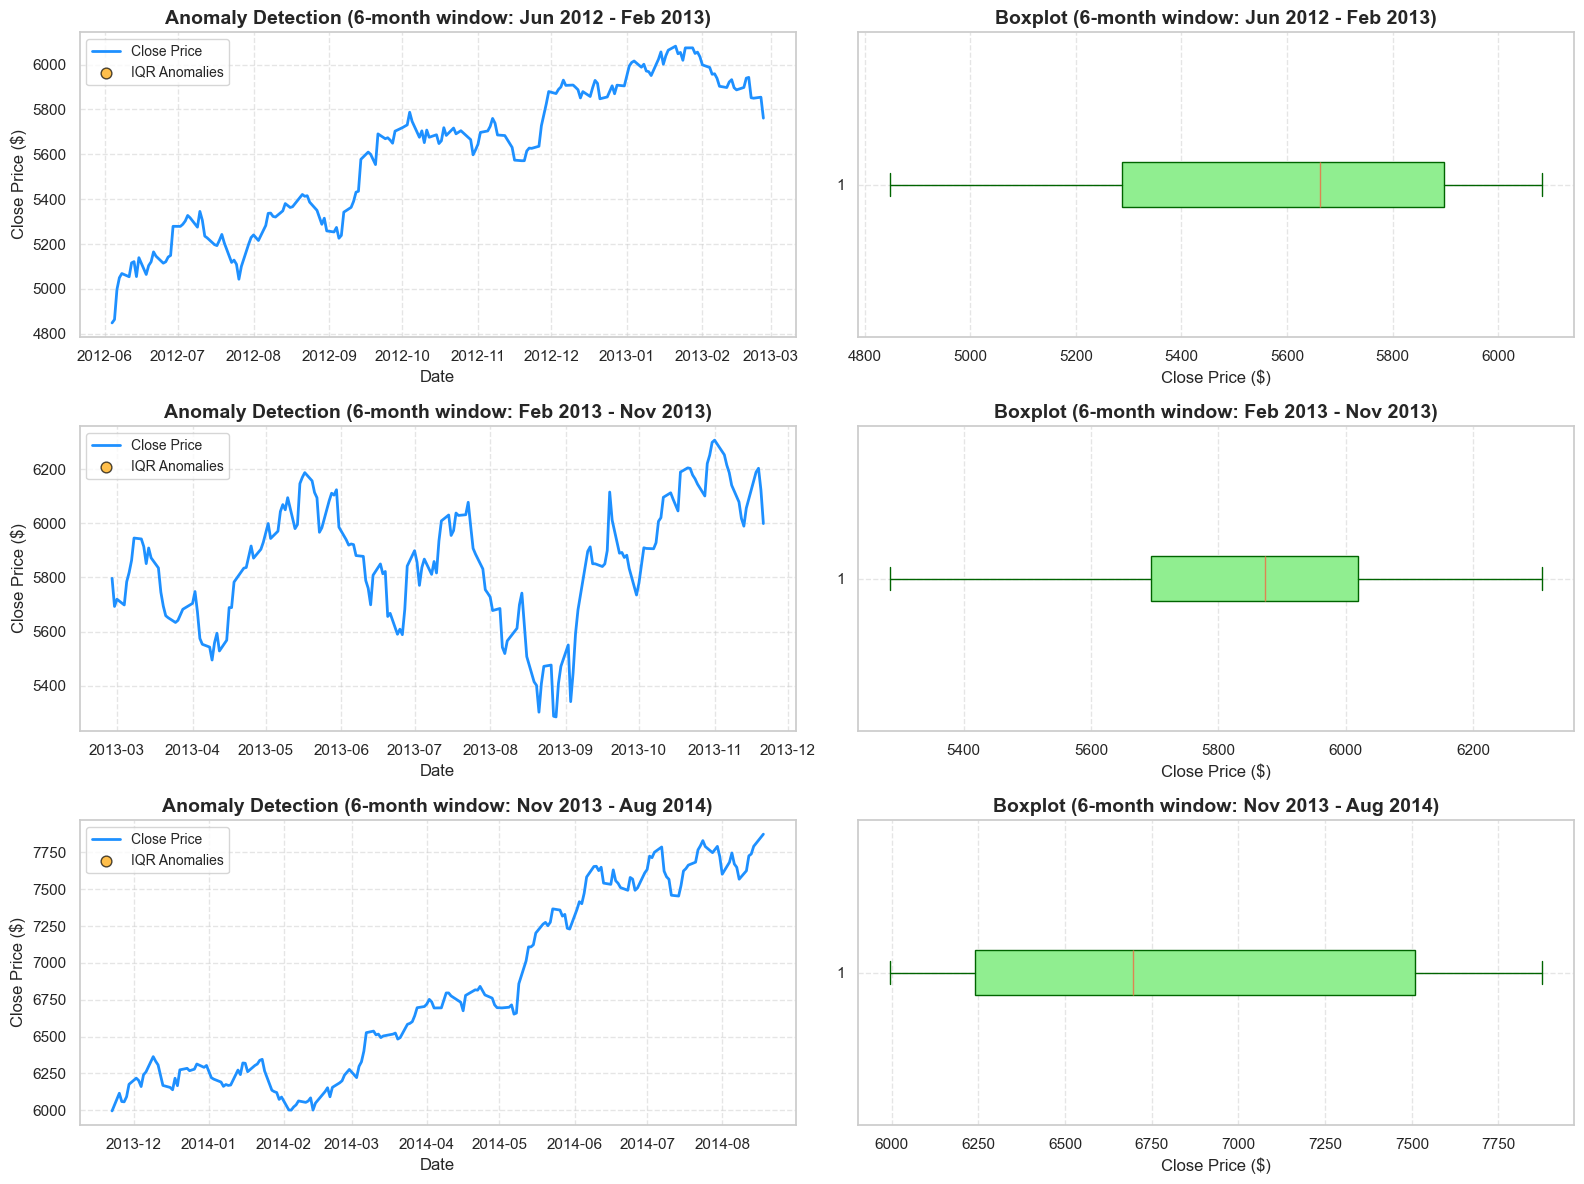

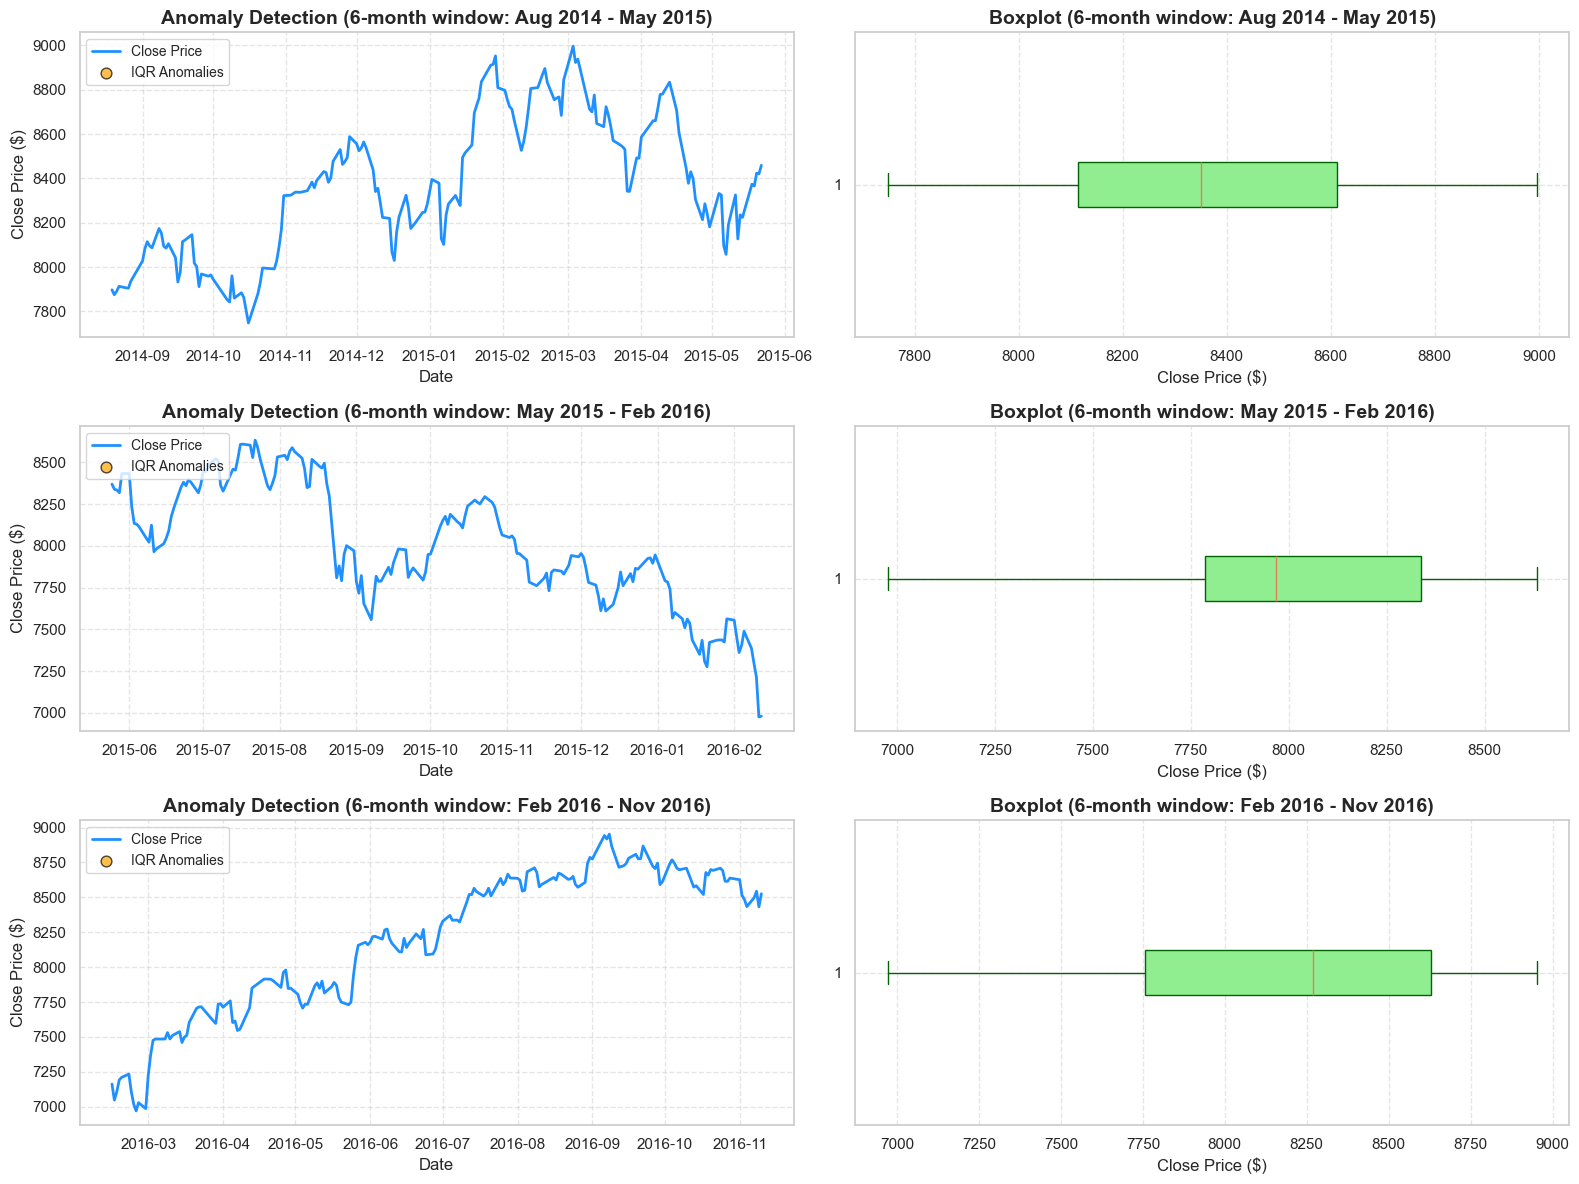

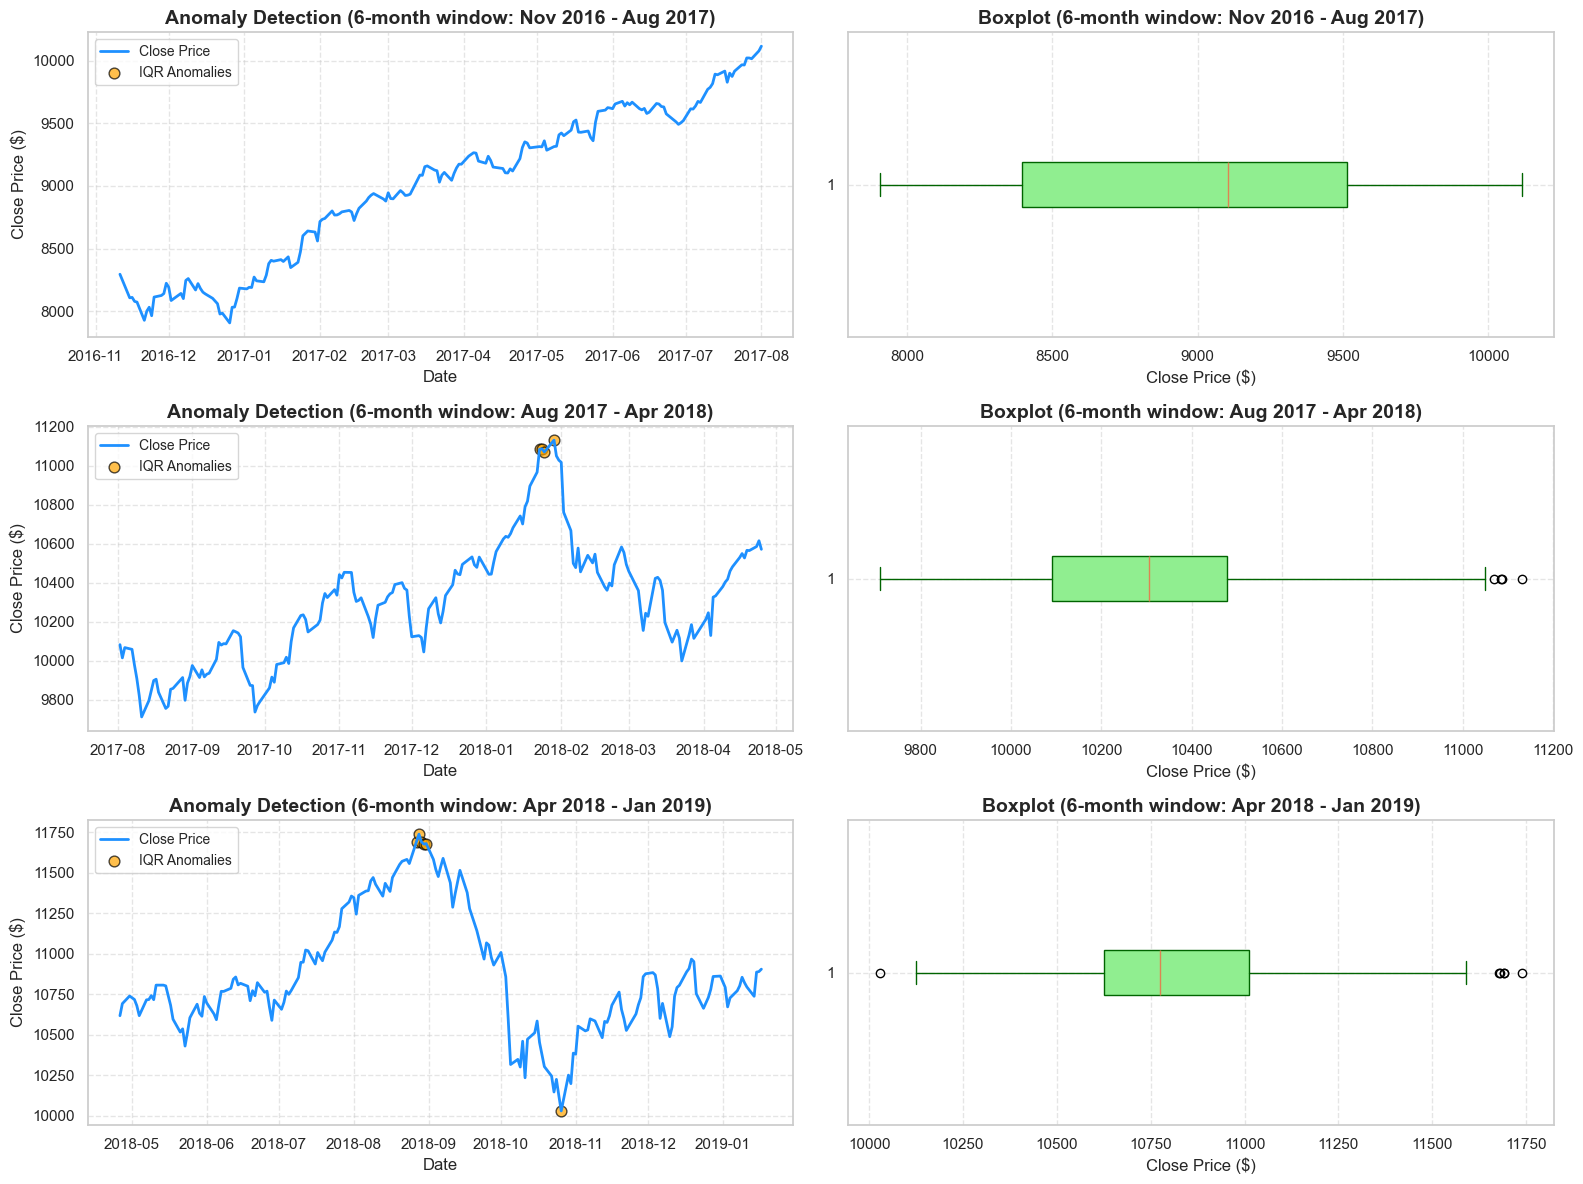

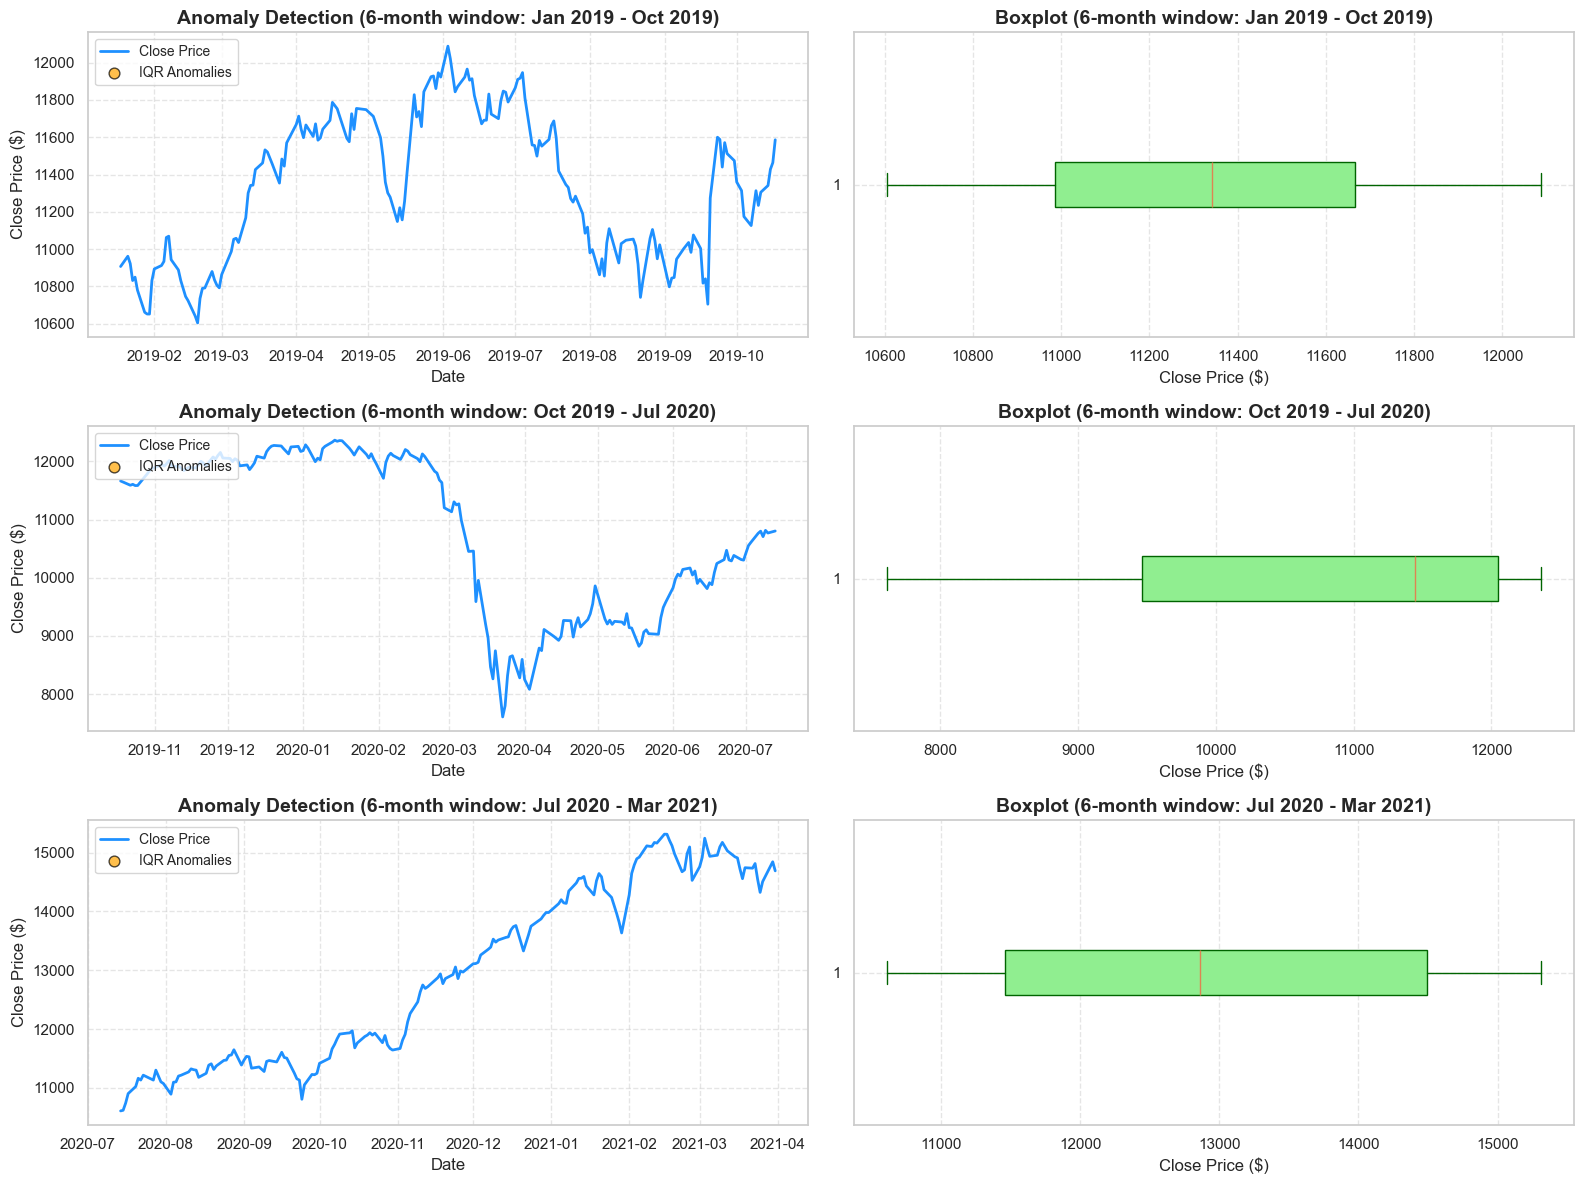

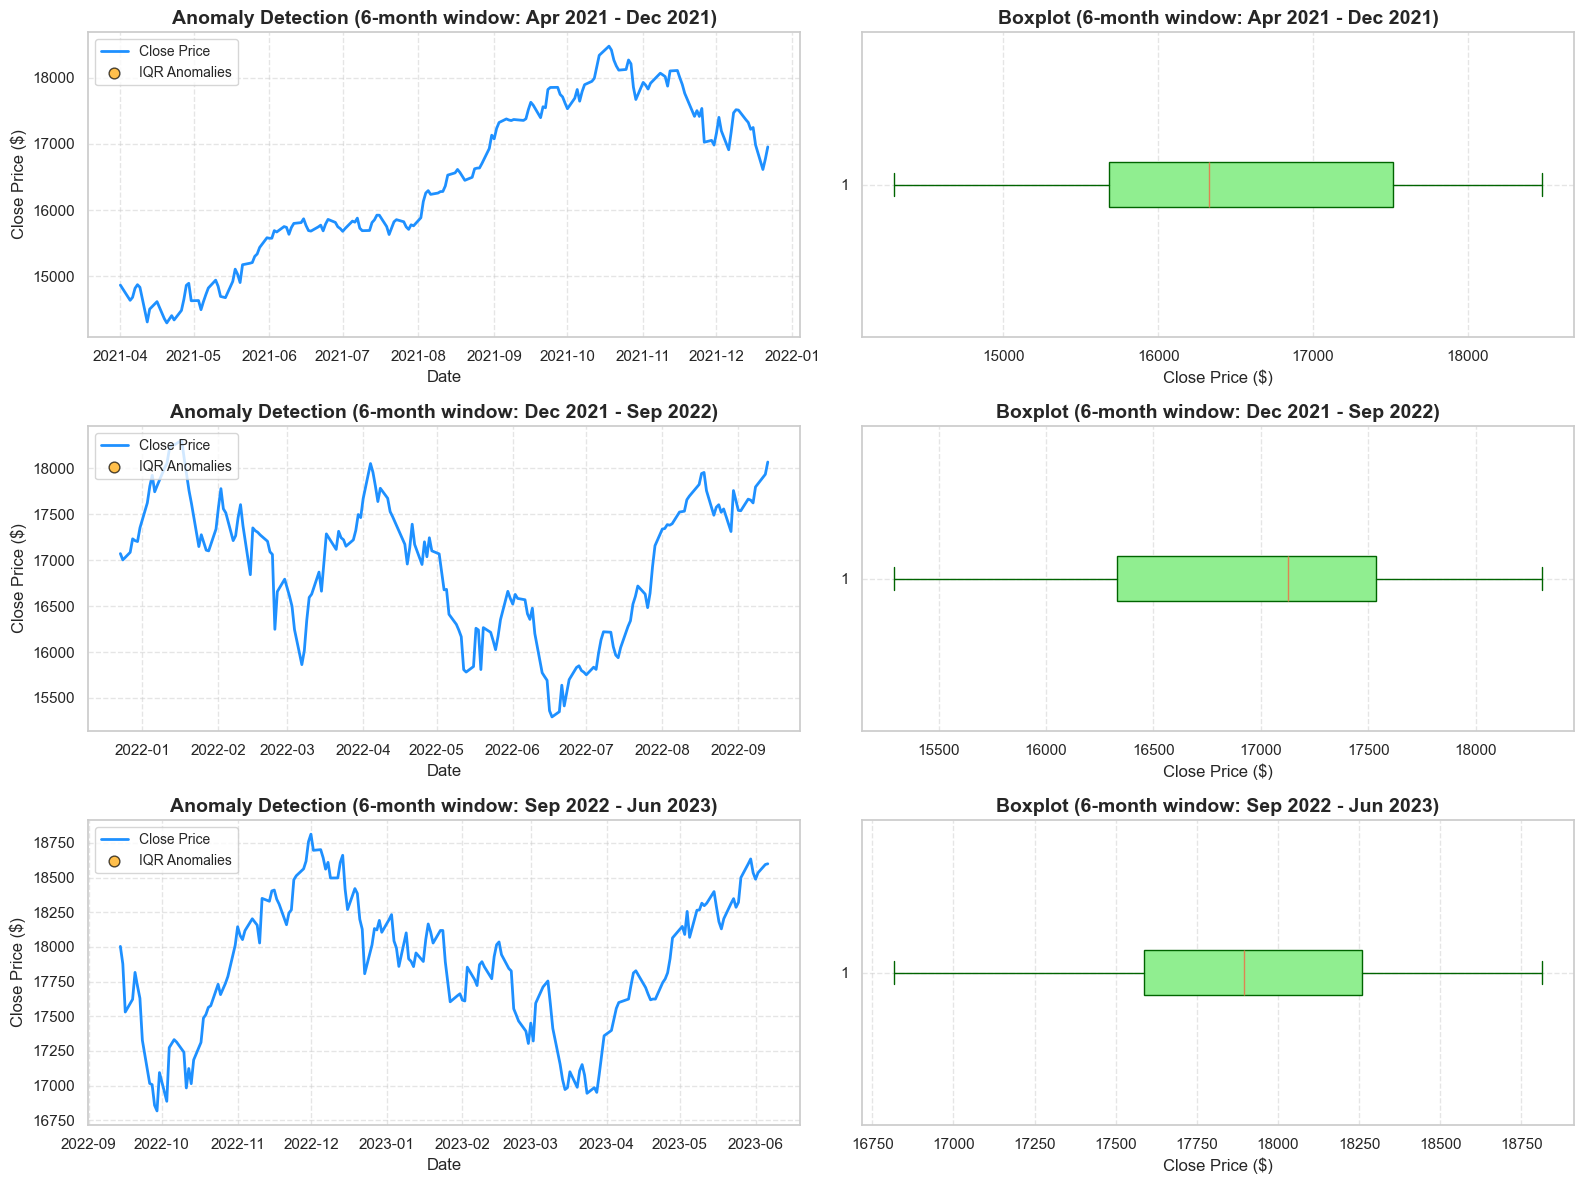

In [14]:


# Ensure Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Function to detect outliers using Z-score
def detect_outliers_zscore(df, threshold=1.5):
    z_scores = zscore(df['Close'])
    return np.abs(z_scores) > threshold

# Function to detect outliers using IQR
def detect_outliers_iqr(df):
    Q1 = df['Close'].quantile(0.25)
    Q3 = df['Close'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (df['Close'] < lower_bound) | (df['Close'] > upper_bound)

# Create a rolling window for every 6 months (~180 days)
window_size = 180  # Assuming daily frequency, this is about 6 months of data
num_windows = len(df) // window_size

# Adjusting the number of subplots per figure to avoid congestion
plots_per_figure = 3  # Number of 6-month windows per figure
fig_size = (16, 12)

# Loop through each 6-month window and plot
for i in range(0, num_windows, plots_per_figure):
    # Create a new figure for each set of plots
    fig, axs = plt.subplots(plots_per_figure, 2, figsize=fig_size, sharex=False)
    fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Increase spacing between subplots

    # Loop through the 6-month windows
    for ax_idx in range(plots_per_figure):
        start = i + ax_idx
        if start * window_size >= len(df):  # Check if we have enough data for this window
            break
        end = start * window_size + window_size
        df_window = df.iloc[start * window_size:end]
        
        # Detect outliers using both Z-score and IQR
        outliers_zscore = detect_outliers_zscore(df_window, threshold=3)
        outliers_iqr = detect_outliers_iqr(df_window)
        
        # --- Anomaly Detection Plot ---
        axs[ax_idx, 0].plot(df_window.index, df_window['Close'], color='dodgerblue', label='Close Price', linewidth=2)
        
        # Highlight anomalies using Z-score method (in red)
        #axs[ax_idx, 0].scatter(df_window.index[outliers_zscore], df_window['Close'][outliers_zscore], 
                               #color='red', label='Z-score Anomalies', s=60, edgecolor='black', alpha=0.7)
        
        # Highlight anomalies using IQR method (in orange)
        axs[ax_idx, 0].scatter(df_window.index[outliers_iqr], df_window['Close'][outliers_iqr], 
                               color='orange', label='IQR Anomalies', s=60, edgecolor='black', alpha=0.7)

        axs[ax_idx, 0].set_title(f'Anomaly Detection (6-month window: {df_window.index[0].strftime("%b %Y")} - {df_window.index[-1].strftime("%b %Y")})', fontsize=14, fontweight='bold')
        axs[ax_idx, 0].set_ylabel('Close Price ($)', fontsize=12)
        axs[ax_idx, 0].set_xlabel('Date', fontsize=12)
        axs[ax_idx, 0].legend(loc='upper left', fontsize=10)
        axs[ax_idx, 0].grid(True, linestyle='--', alpha=0.5)
        
        # --- Boxplot ---
        axs[ax_idx, 1].boxplot(df_window['Close'], vert=False, patch_artist=True, 
                               boxprops=dict(facecolor='lightgreen', color='darkgreen'),
                               whiskerprops=dict(color='darkgreen'),
                               capprops=dict(color='darkgreen'),
                               flierprops=dict(marker='o', color='red', markersize=6))
        
        axs[ax_idx, 1].set_title(f'Boxplot (6-month window: {df_window.index[0].strftime("%b %Y")} - {df_window.index[-1].strftime("%b %Y")})', fontsize=14, fontweight='bold')
        axs[ax_idx, 1].set_xlabel('Close Price ($)', fontsize=12)
        axs[ax_idx, 1].grid(True, linestyle='--', alpha=0.5)

    # Adjust layout for better spacing between the plots
    plt.tight_layout()

    # Show the plots for the current figure
    plt.show()


Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - loss: 0.0239
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0012
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 8.5766e-04
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 7.6405e-04
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 6.9395e-04
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 5.4803e-04
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 4.5999e-04
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 4.8140e-04
Epoch 9/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 4.3267e-04
Epoch 10/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 4.2884e-04
Epoch 11/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 4.1242e-04
Epoch 12/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 3.7439e-04
Epoch 13/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 3.3237e-04
Epoch 14/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 3.0630e-04
Epoch 15/50
48/48 ━━━━

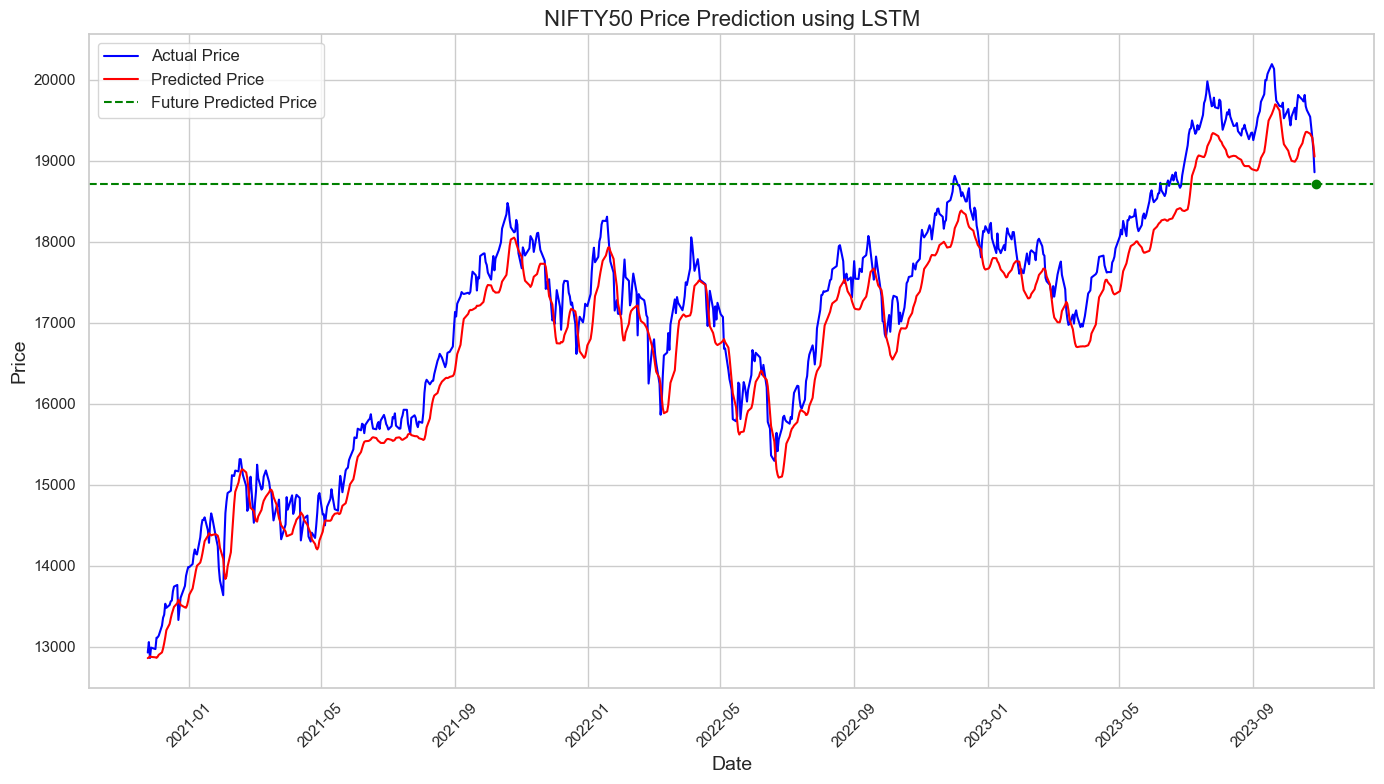

In [15]:


# Load data
df = pd.read_csv(r"C:\Users\Akash\Documents\Jupyter\IDSE\Project\Data set\Updated\Updated\Nifty_50_data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Use only the 'Adj Close' column
data = df[['Adj Close']].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split data into training and test sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Prepare the data for LSTM
def create_dataset(data, time_step=50):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 50
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Create the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Adding dropout layer
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))  # Adding dropout layer
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=64, epochs=50)

# Predict on the test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)), predictions))
print(f'Root Mean Squared Error: {rmse:.2f}')

# Prepare for future prediction
last_data = scaled_data[-time_step:].reshape(1, time_step, 1)
future_prediction = model.predict(last_data)
future_price = scaler.inverse_transform(future_prediction)[0, 0]
last_actual_price = data[-1, 0]
percentage_change = ((future_price - last_actual_price) / last_actual_price) * 100

# Get the predicted date
last_date = df.index[-1]
predicted_date = last_date + pd.Timedelta(days=1)

print(f'Future Predicted Price: {future_price:.2f}')
print(f'Last Actual Price: {last_actual_price:.2f}')
print(f'Percentage Change: {percentage_change:.2f}%')
print(f'Predicted Date: {predicted_date.date()}')

# Plot the results
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")
plt.plot(df.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), color='blue', label='Actual Price')
plt.plot(df.index[-len(predictions):], predictions, color='red', label='Predicted Price')
plt.axhline(y=future_price, color='green', linestyle='--', label='Future Predicted Price')
plt.scatter(predicted_date, future_price, color='green', zorder=5)  # Mark the predicted price
plt.title('NIFTY50 Price Prediction using LSTM', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:


# Calculate additional metrics
mae = mean_absolute_error(scaler.inverse_transform(y_test.reshape(-1, 1)), predictions)
r2 = r2_score(scaler.inverse_transform(y_test.reshape(-1, 1)), predictions)

# Display the results
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R² Score: {r2:.2f}')

# For completeness, you can also compute MAPE
mape = np.mean(np.abs((scaler.inverse_transform(y_test.reshape(-1, 1)) - predictions) /
                      scaler.inverse_transform(y_test.reshape(-1, 1)))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


Root Mean Squared Error (RMSE): 401.49
Mean Absolute Error (MAE): 349.82
R² Score: 0.94
Mean Absolute Percentage Error (MAPE): 2.03%


In [22]:
data_diff = data.diff(1).dropna()


In [24]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data_diff)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: -17.035511400062457
p-value: 8.266916838775469e-30


In [25]:
# Assuming your differenced data is stored in `data_diff`
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model (order=(p,d,q))
model = ARIMA(data_diff, order=(5, 1, 2))  # You can adjust p, d, q as needed
fitted_model = model.fit()

# Print the model summary
print(fitted_model.summary())


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 3877
Model:                 ARIMA(5, 1, 2)   Log Likelihood              -23562.113
Date:                Wed, 06 Nov 2024   AIC                          47140.226
Time:                        10:44:25   BIC                          47190.326
Sample:                             0   HQIC                         47158.014
                               - 3877                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5189      0.089     -5.853      0.000      -0.693      -0.345
ar.L2          0.0172      0.010      1.691      0.091      -0.003       0.037
ar.L3         -0.0179      0.011     -1.625      0.1

In [31]:
forecast_obj = fitted_model.get_forecast(steps=len(test))  # Forecast for the test set
forecast = forecast_obj.predicted_mean
conf_int = forecast_obj.conf_int(99)  # Get confidence intervals for the forecast


In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate the model's forecast
mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)
r2 = r2_score(test, forecast)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 313487638.73
Mean Absolute Error (MAE): 17671.62
R² Score: -259.85


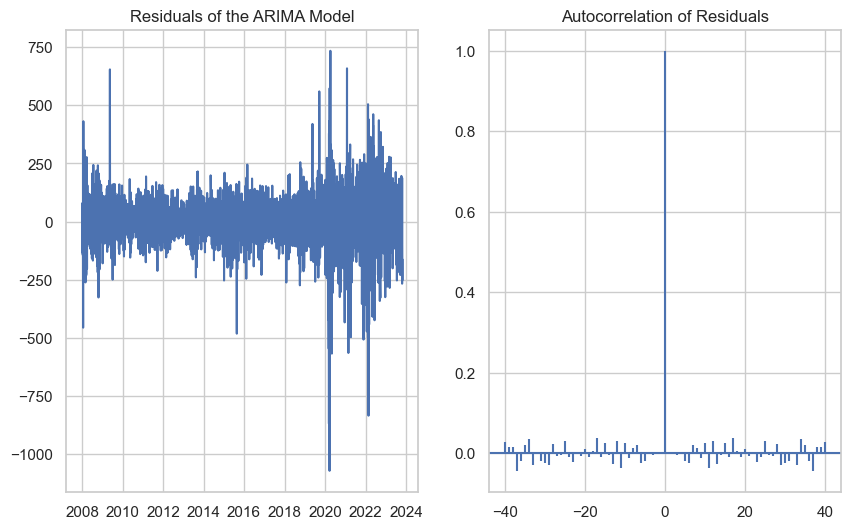

In [33]:
# Plot residuals
residuals = fitted_model.resid
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(residuals)
plt.title('Residuals of the ARIMA Model')

# Autocorrelation plot
plt.subplot(1, 2, 2)
plt.acorr(residuals, maxlags=40)
plt.title('Autocorrelation of Residuals')
plt.show()


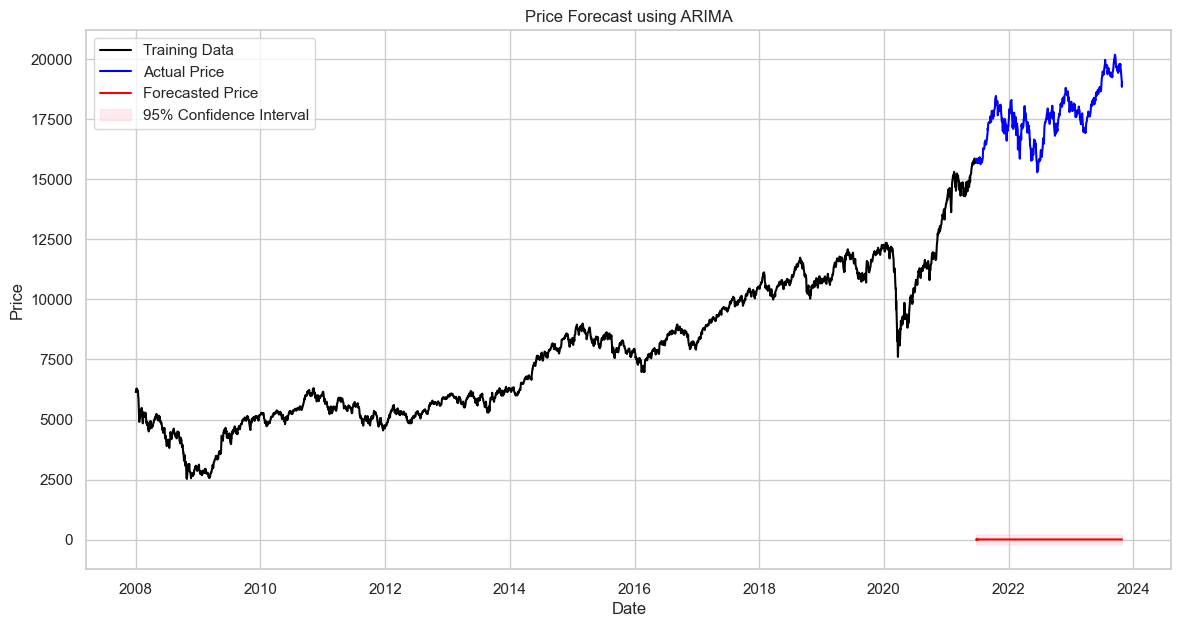

In [34]:
# Plotting the forecast
plt.figure(figsize=(14, 7))
plt.plot(train.index, train, color='black', label='Training Data')
plt.plot(test.index, test, color='blue', label='Actual Price')
plt.plot(test.index, forecast, color='red', label='Forecasted Price')
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label='95% Confidence Interval')
plt.title('Price Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


                                      SARIMAX Results                                       
Dep. Variable:                            Adj Close   No. Observations:                 3878
Model:             SARIMAX(5, 1, 2)x(1, 1, [1], 12)   Log Likelihood                   0.000
Date:                              Wed, 06 Nov 2024   AIC                             20.000
Time:                                      10:55:09   BIC                             82.597
Sample:                                           0   HQIC                            42.228
                                             - 3878                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.9988   1.03e-06   2.92e+06      0.000       2.999       2.999
ar.L2         -1.99

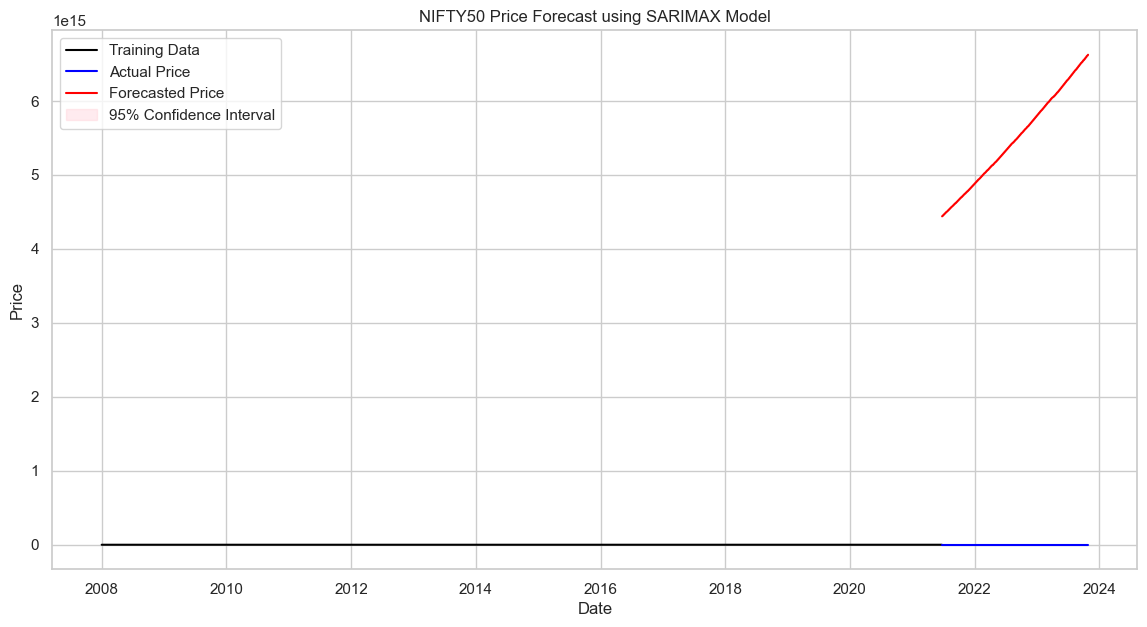

Mean Squared Error (MSE): 30485576712514293280937519087616.00
Mean Absolute Error (MAE): 5485121607749231.00
R² Score: -25366897988096110811414528.00


In [38]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Adjust the (p, d, q) and seasonal_order (P, D, Q, S) to try different configurations
sarimax_model = SARIMAX(data, order=(5, 1, 2), seasonal_order=(1, 1, 1, 12))  # Example seasonal_order for monthly data
sarimax_fitted = sarimax_model.fit()

# Print the model summary to check the coefficients and diagnostics
print(sarimax_fitted.summary())

# Forecasting future values
forecast_steps = len(test)
forecast = sarimax_fitted.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot the forecasted vs actual values
plt.figure(figsize=(14, 7))
plt.plot(train.index, train, color='black', label='Training Data')
plt.plot(test.index, test, color='blue', label='Actual Price')
plt.plot(test.index, forecast_mean, color='red', label='Forecasted Price')
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label='95% Confidence Interval')
plt.title('NIFTY50 Price Forecast using SARIMAX Model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model's forecast
mse = mean_squared_error(test, forecast_mean)
mae = mean_absolute_error(test, forecast_mean)
r2 = r2_score(test, forecast_mean)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=39344.976, Time=7.94 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=39389.805, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=39390.920, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=39390.947, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=39390.842, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=39390.833, Time=5.81 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=39394.217, Time=2.10 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=39333.905, Time=11.36 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=39395.434, Time=0.85 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=39324.483, Time=12.52 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=39379.229, Time=11.24 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=39319.873, Time=13.78 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=39360.574, Time=6.00 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=14.94 sec
 ARIMA(4,1,3)(0,0,0)

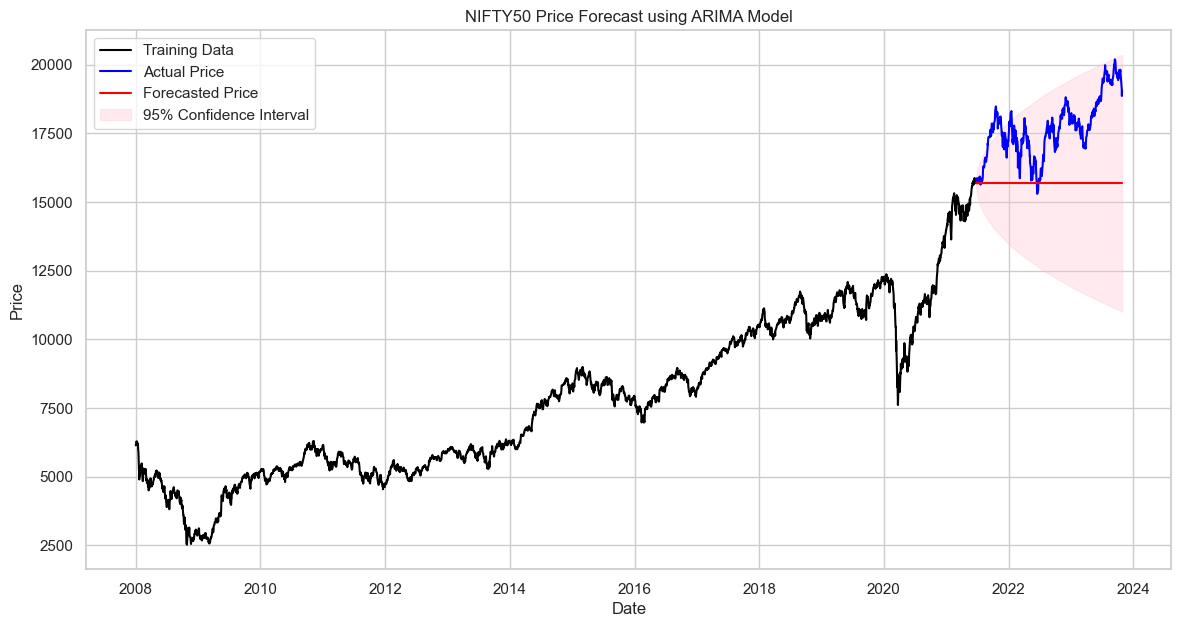

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load and preprocess the data
df = pd.read_csv(r"C:\Users\Akash\Documents\Jupyter\IDSE\Project\Data set\Updated\Updated\Nifty_50_data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
data = df['Adj Close']

# Split the data
train_size = int(len(data) * 0.85)
train, test = data[:train_size], data[train_size:]

# Auto ARIMA to find the best (p, d, q)
auto_model = auto_arima(train, seasonal=True, trace=True)
print(auto_model.summary())

# Fit the ARIMA model
model = ARIMA(train, order=auto_model.order)
fitted_model = model.fit()

# Forecast using get_forecast(), change alpha for confidence level
alpha_value = 0.01  # 99% Confidence Interval (you can set this to 0.05 for 95%)
forecast_obj = fitted_model.get_forecast(steps=len(test), alpha=alpha_value)
forecast = forecast_obj.predicted_mean
conf_int = forecast_obj.conf_int()  # This will use the new alpha value

# Calculate metrics
mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)
r2 = r2_score(test, forecast)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(train.index, train, color='black', label='Training Data')
plt.plot(test.index, test, color='blue', label='Actual Price')
plt.plot(test.index, forecast, color='red', label='Forecasted Price')
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label='95% Confidence Interval')
plt.title('NIFTY50 Price Forecast using ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=39344.976, Time=7.00 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=39389.805, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=39390.920, Time=0.31 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=39390.947, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=39390.842, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=39390.833, Time=5.47 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=39394.217, Time=2.22 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=39333.905, Time=11.68 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=39395.434, Time=0.97 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=39324.483, Time=13.45 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=39379.229, Time=11.09 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=39319.873, Time=14.36 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=39360.574, Time=6.64 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=14.53 sec
 ARIMA(4,1,3)(0,0,0)

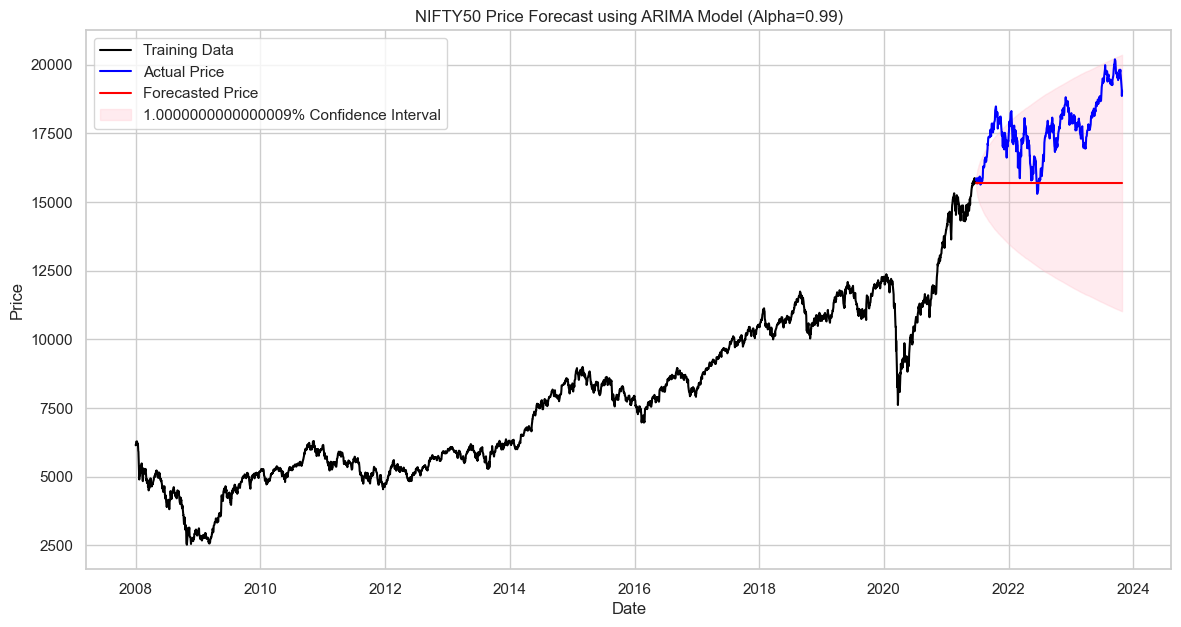

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load and preprocess the data
df = pd.read_csv(r"C:\Users\Akash\Documents\Jupyter\IDSE\Project\Data set\Updated\Updated\Nifty_50_data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
data = df['Adj Close']

# Split the data
train_size = int(len(data) * 0.85)
train, test = data[:train_size], data[train_size:]

# Auto ARIMA to find the best (p, d, q)
auto_model = auto_arima(train, seasonal=False, trace=True)
print(auto_model.summary())

# Fit the ARIMA model
model = ARIMA(train, order=auto_model.order)
fitted_model = model.fit()

# Set alpha to control confidence level
alpha_value = 0.99  # Try with 0.01 for 99% Confidence Interval or 0.05 for 95% Confidence Interval
forecast_obj = fitted_model.get_forecast(steps=len(test), alpha=alpha_value)  # Passing alpha here
forecast = forecast_obj.predicted_mean
conf_int = forecast_obj.conf_int()  # Get the confidence interval based on alpha

# Calculate metrics
mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)
r2 = r2_score(test, forecast)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# Plotting the forecast with the confidence intervals
plt.figure(figsize=(14, 7))
plt.plot(train.index, train, color='black', label='Training Data')
plt.plot(test.index, test, color='blue', label='Actual Price')
plt.plot(test.index, forecast, color='red', label='Forecasted Price')

# Plot the confidence interval
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label=f'{(1-alpha_value)*100}% Confidence Interval')

plt.title(f'NIFTY50 Price Forecast using ARIMA Model (Alpha={alpha_value})')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
